In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 8})

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# I. LOAD DATA

In [3]:
train0 = pd.read_csv('./Data/train.csv') 

In [4]:
train0.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print('The number of rows: ', train0.shape[0])

The number of rows:  1460


In [6]:
print('The datatypes in the dataframe:')
train0.dtypes.unique()

The datatypes in the dataframe:


array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [7]:
#list(train0)

## Create some new variables

In [8]:
# Create New Numerical Variables
train0['AgeHome'] = train0['YrSold'] - train0['YearBuilt']
train0['YrsSinceRemodel'] = train0['YrSold'] - train0['YearRemodAdd']  
train0['AgeGarage'] = train0['YrSold'] - train0['GarageYrBlt']  

In [9]:
# Ensure these variabes are categorical
train0['MSSubClass'] = train0['MSSubClass'].astype(str)
train0['MoSold'] = train0['MoSold'].astype(str)
train0['YrSold'] = train0['YrSold'].astype(str)

#train0['OverallQual'] = train0['OverallQual'].astype(str)
#train0['OverallCond'] = train0['OverallCond'].astype(str)
#train0['YearBuilt'] = train0['YearBuilt'].astype(str)
#train0['YearRemodAdd'] = train0['YearRemodAdd'].astype(str)
#train0['GarageYrBlt'] = train0['GarageYrBlt'].astype(str)

In [10]:
## Replacing this string np.nan (will look at missing values later)
#train0.loc[(train0['GarageYrBlt']=='nan'),'GarageYrBlt']= np.nan

# II. EXPLORATORY DATA ANALYSIS & VISUALIZATIONS

### Look at the Output/Dependent Variable (Y) - SalePrice 🎯

In [11]:
zthres = 4
# Which indices have z-scores >  zthres
zvals = stats.zscore(train0['SalePrice'])
indx = np.where(abs(zvals) > 4.0)

print('The indices with z-scores > ', zthres,':')
print(indx)
print('\nThose z-scores: ')
print(zvals[indx])
print('\nNumber of indices:',len(indx[0]))

The indices with z-scores >  4 :
(array([ 178,  440,  691,  769,  803,  898, 1046, 1169, 1182]),)

Those z-scores: 
[4.04098249 4.71041276 7.22881942 4.49634819 5.06214602 5.42383959
 4.73032076 5.59185509 7.10289909]

Number of indices: 9


25th percentile: 129975.0
50th percentile: 163000.0
75th percentile: 214000.0
# of Missing Rows:  0  out of  1460


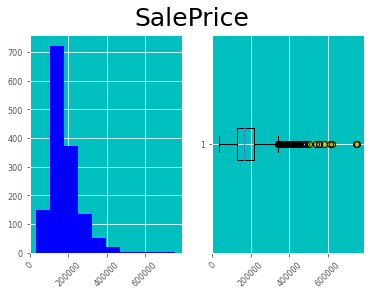

In [12]:
# The Distribution of the OUTPUT/DEPENDENT variable

fig, axs = plt.subplots(1,2)
fig.suptitle('SalePrice',fontsize=25)
axs[1].boxplot(train0['SalePrice'],vert=False)
axs[1].tick_params(axis='x', rotation = 45)
axs[1].set_facecolor('c')

axs[1].scatter(train0.loc[indx,'SalePrice'], 
              [np.ones(len(indx[0]))],color='y') # large z-scores 

axs[0].hist(train0['SalePrice'],color='b')
axs[0].tick_params(axis='x', rotation=45)
axs[0].set_facecolor('c')

print('25th percentile:',train0['SalePrice'].quantile(.25))
print('50th percentile:',train0['SalePrice'].median())
print('75th percentile:',train0['SalePrice'].quantile(.75))
print('# of Missing Rows: ', train0['SalePrice'].isna().sum(), 
    ' out of ',len(train0['SalePrice']))

In [13]:
train0.shape[0]

1460

## A. The Numeric Variables

In [14]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_train = train0.select_dtypes(include=numerics)
numlist = list(num_train)
print(len(numlist),' numeric variables')
print(numlist)

38  numeric variables
['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'AgeHome', 'YrsSinceRemodel', 'AgeGarage']


### The Independent Variable (Xs) 

In [15]:
# correlation threshold, used to highlight particular figures 
corr_thrshld = 0.4

<ipython-input-16-d92d7892d980>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1,2)


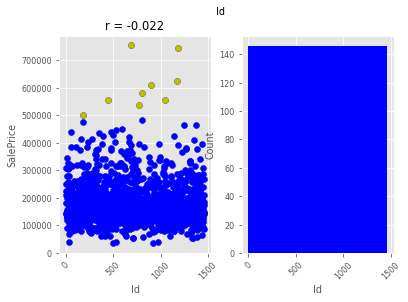

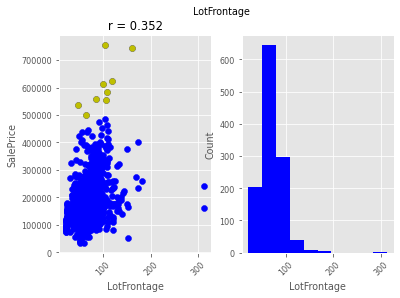

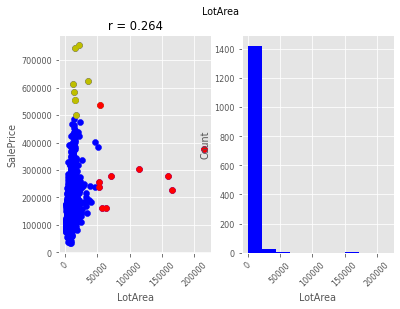

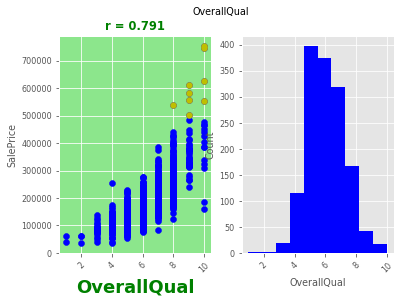

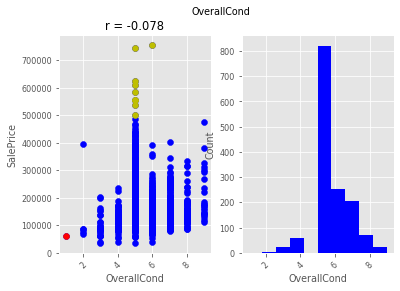

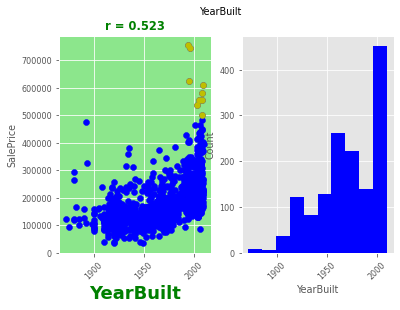

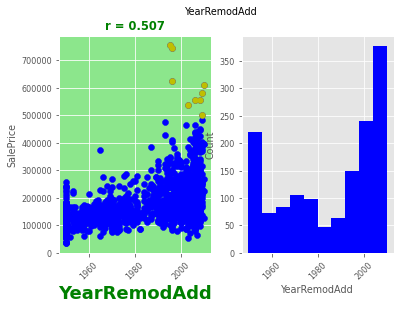

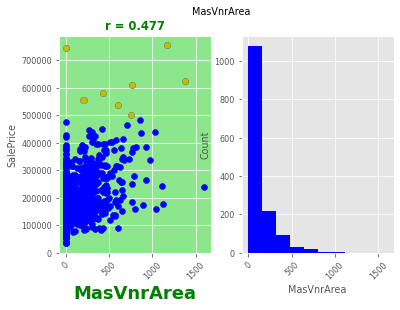

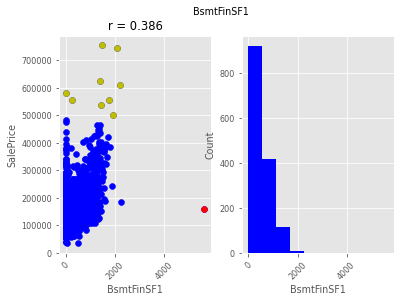

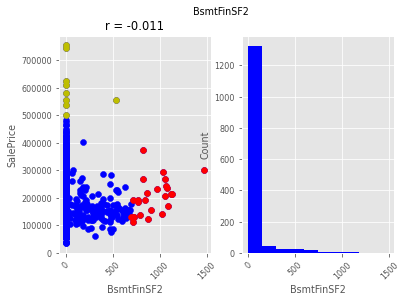

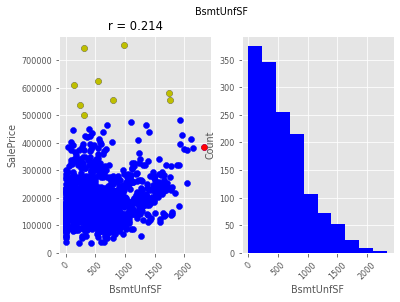

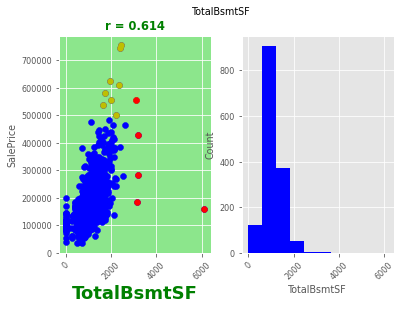

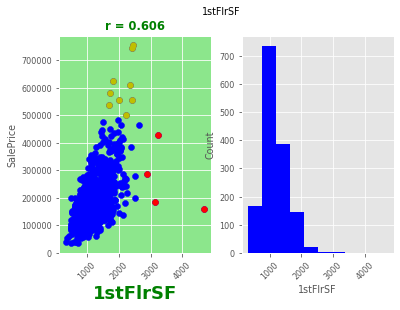

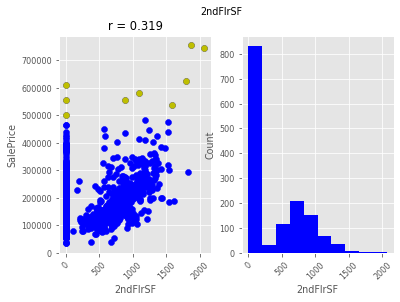

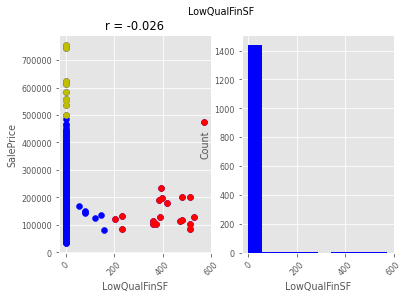

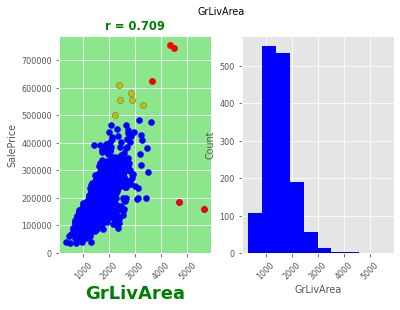

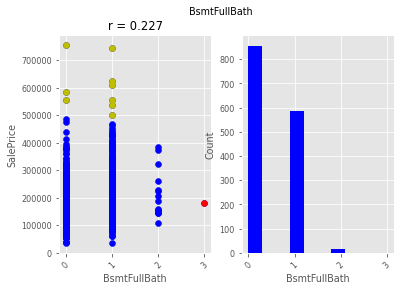

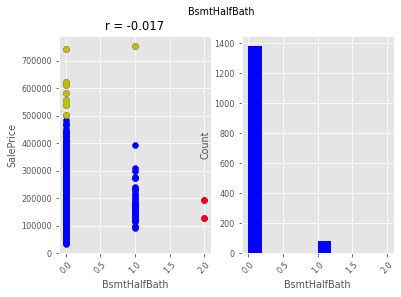

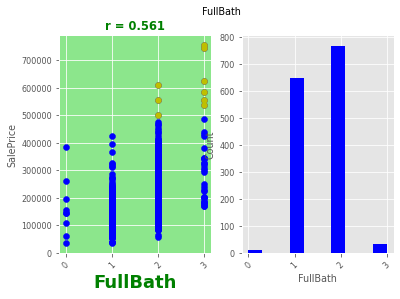

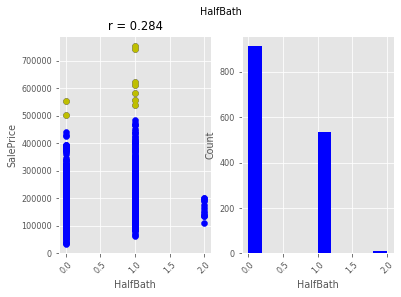

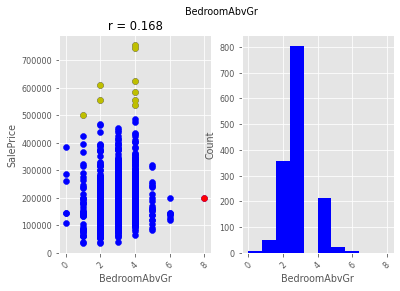

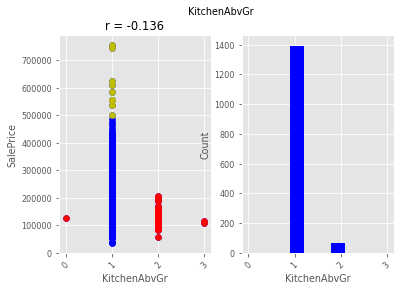

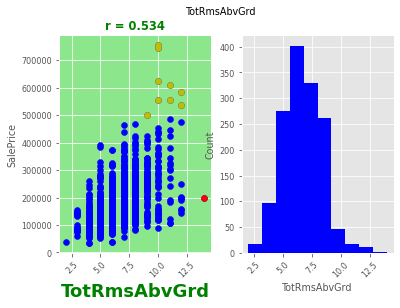

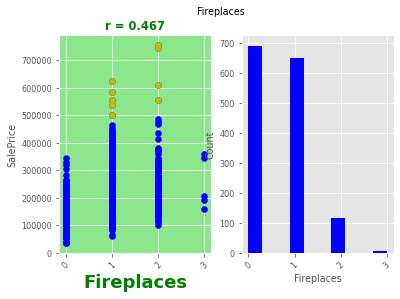

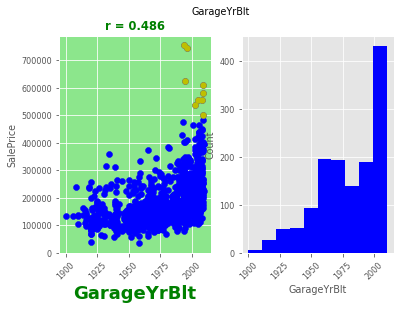

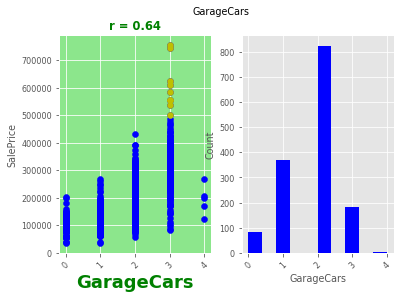

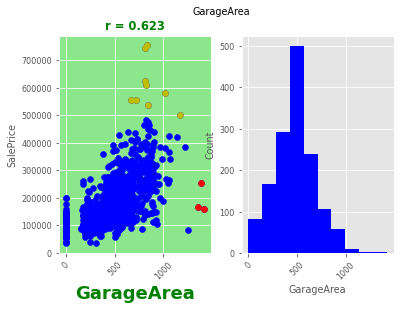

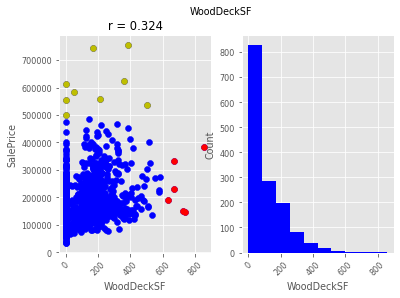

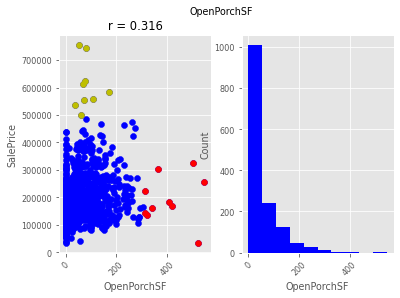

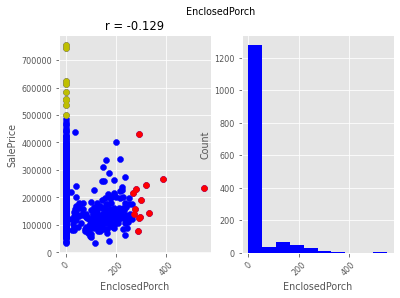

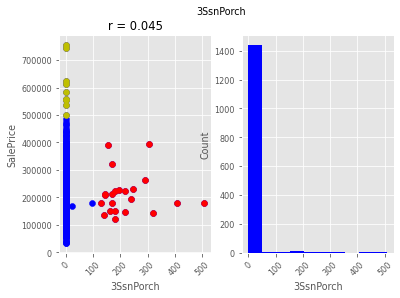

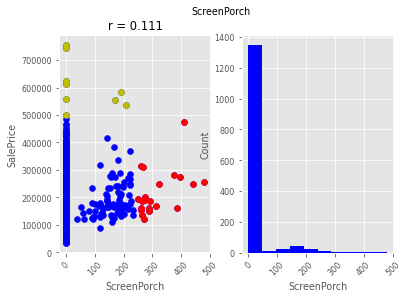

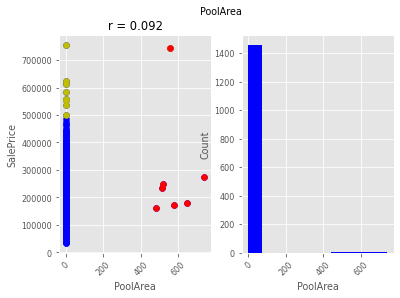

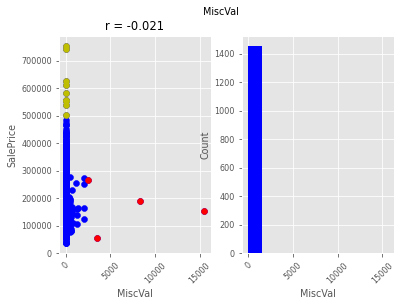

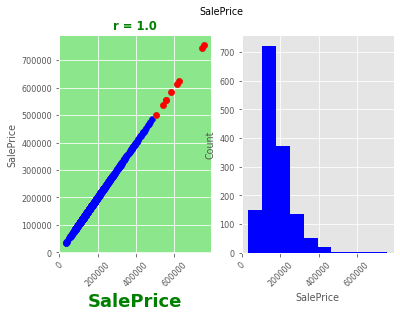

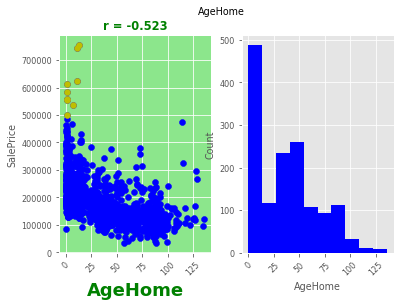

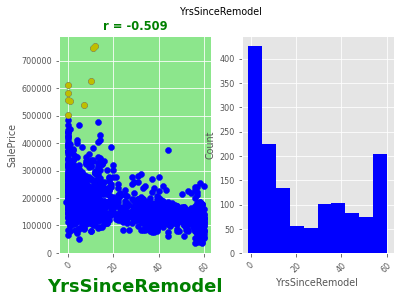

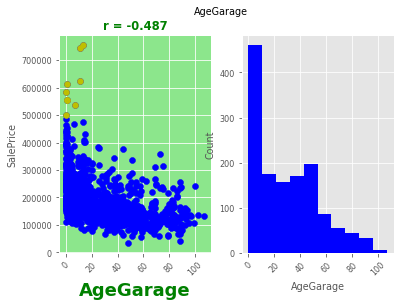

In [16]:
import numpy.ma as ma # need this to allow corrcoef to handle the nan rows

for nvar in numlist:
    fig, axs = plt.subplots(1,2)
    fig.suptitle(nvar)
    
    # Histogram
    axs[1].hist(train0[nvar],color='b')
    axs[1].tick_params(axis='x', rotation=45)
    axs[1].set_ylabel('Count')
    axs[1].set_xlabel(nvar)
    
    # Which indices have z-scores > 4
    zvals = stats.zscore(train0[nvar])
    zindx = np.where(abs(zvals) > 4)

    # Scatter
    axs[0].scatter(train0[nvar],train0['SalePrice'],color='b')
    axs[0].scatter(train0.loc[indx,nvar],
                   train0.loc[indx,'SalePrice'],color='y') # *** SalePrice z-scores > 4
    axs[0].scatter(train0.loc[zindx,nvar],
                   train0.loc[zindx,'SalePrice'],color='r') # z-scores > 4

    r = ma.corrcoef(ma.masked_invalid(train0[nvar]), 
                ma.masked_invalid(train0['SalePrice']))
    
    if np.abs(r[0,1]) >= corr_thrshld:
        axs[0].set_title(('r = '+ str(round(r[0,1],3))), fontweight = 'bold',color='g')
        axs[0].set_facecolor('#8ce68c')
        axs[0].set_xlabel(nvar, fontsize = 18, fontweight = 'bold',color='g')
        
    elif np.abs(r[0,1]) < corr_thrshld:
        axs[0].set_title(('r = ' + str(round(r[0,1],3))))
        axs[0].set_xlabel(nvar)
    
    axs[0].tick_params(axis='x', rotation=45)
    axs[0].set_ylabel('SalePrice')

In [17]:
# num_train.describe()

In [18]:
# Correlations between Output variable and other numerical variables
correlations = num_train.corr()
ycorr = correlations['SalePrice']
ycorr[np.abs(ycorr)>corr_thrshld]
#x = ycorr[np.abs(ycorr)>corr_thrshld]

OverallQual        0.790982
YearBuilt          0.522897
YearRemodAdd       0.507101
MasVnrArea         0.477493
TotalBsmtSF        0.613581
1stFlrSF           0.605852
GrLivArea          0.708624
FullBath           0.560664
TotRmsAbvGrd       0.533723
Fireplaces         0.466929
GarageYrBlt        0.486362
GarageCars         0.640409
GarageArea         0.623431
SalePrice          1.000000
AgeHome           -0.523350
YrsSinceRemodel   -0.509079
AgeGarage         -0.487069
Name: SalePrice, dtype: float64

Taking a closer look at GrLivArea 🤔 and SaleCondition

In [19]:
large_zscores = np.where(abs(stats.zscore(train0['GrLivArea'])) > 4.5)
print(large_zscores)

(array([ 523,  691, 1182, 1298]),)


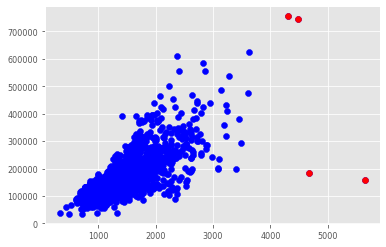

In [20]:
plt.scatter(train0['GrLivArea'],train0['SalePrice'],color='b')
plt.scatter(train0.loc[large_zscores,'GrLivArea'],
                   train0.loc[large_zscores,'SalePrice'],color='r') # z-scores > 4

In [21]:
train0.loc[[523,  691, 1182, 1298],:]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeHome,YrsSinceRemodel,AgeGarage
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750,0,-1,0.0
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000,13,12,13.0
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000,11,11,11.0
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000,0,0,0.0


In [22]:
# Debating if these should be included?
np.where(train0['SaleCondition']=='Family')

(array([ 137,  154,  217,  251,  299,  454,  628,  632,  655,  734,  804,
         822,  858,  886, 1102, 1127, 1145, 1242, 1387, 1404]),)

## B. The Categorical Variables

In [23]:
cattypes = ['O']
cat_train = train0.select_dtypes(include=cattypes)
catlist = list(cat_train)
print(len(catlist),' categorical variables')
catlist

46  categorical variables


['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

# III. PREPROCESSING - Preparation for Model Training

<ipython-input-24-af096ca90273>:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (15,8))


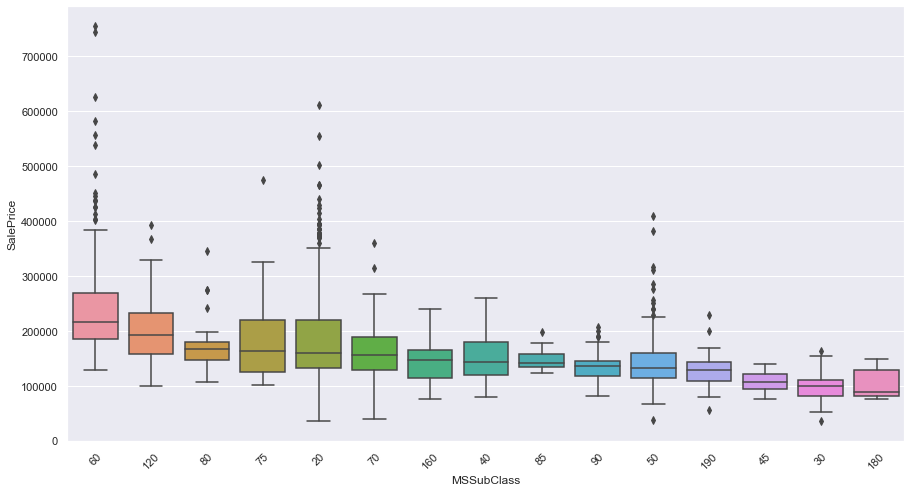

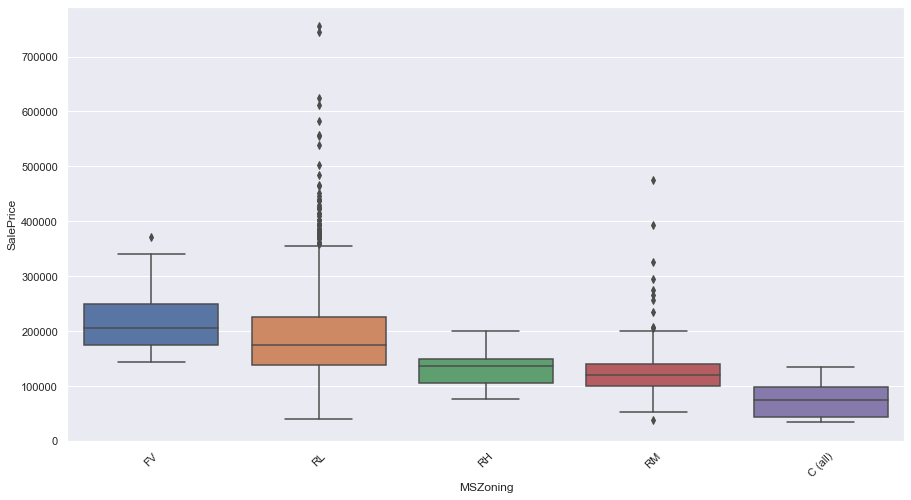

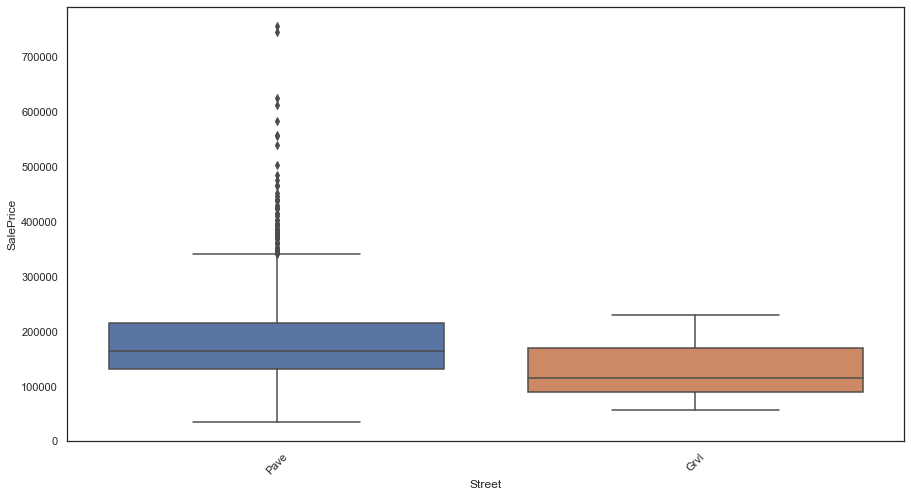

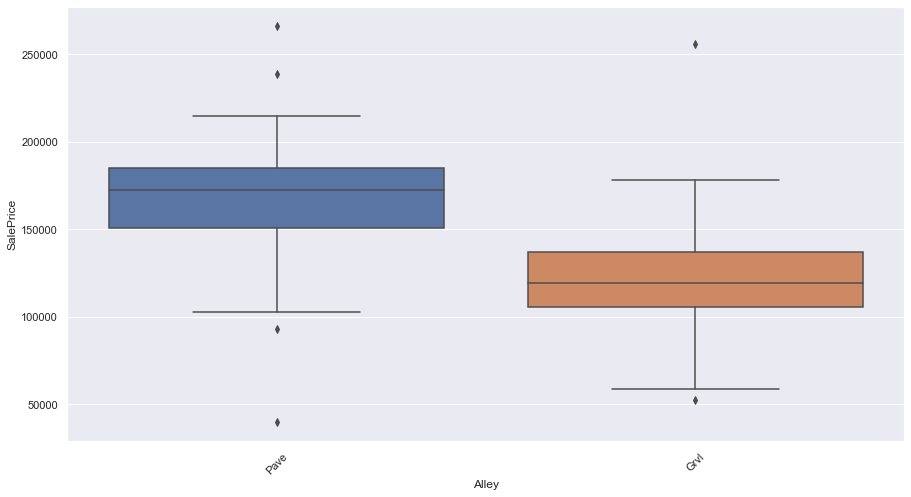

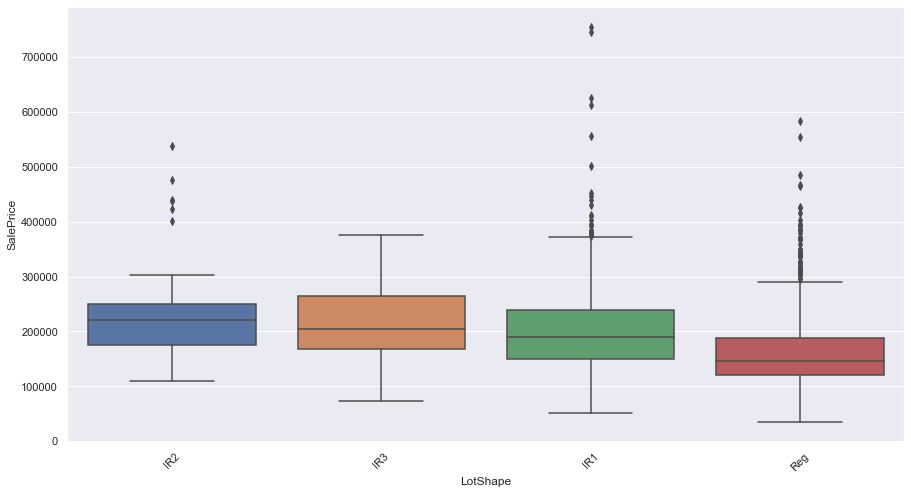

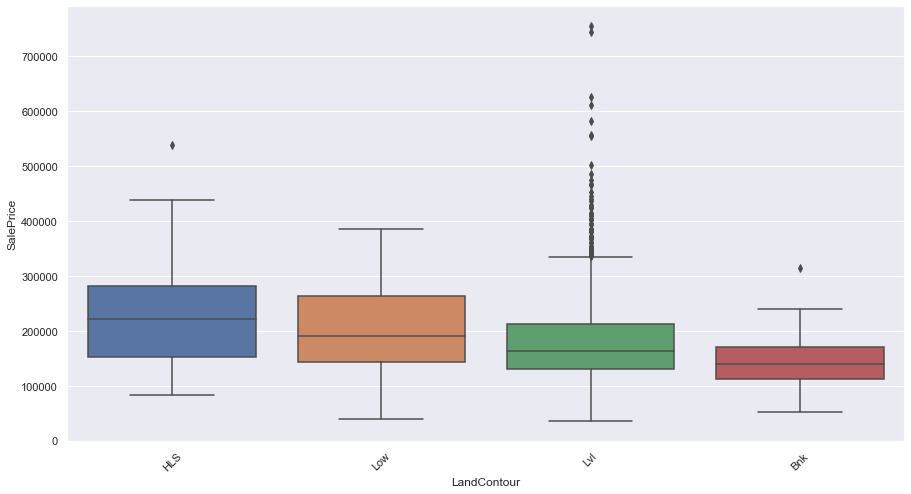

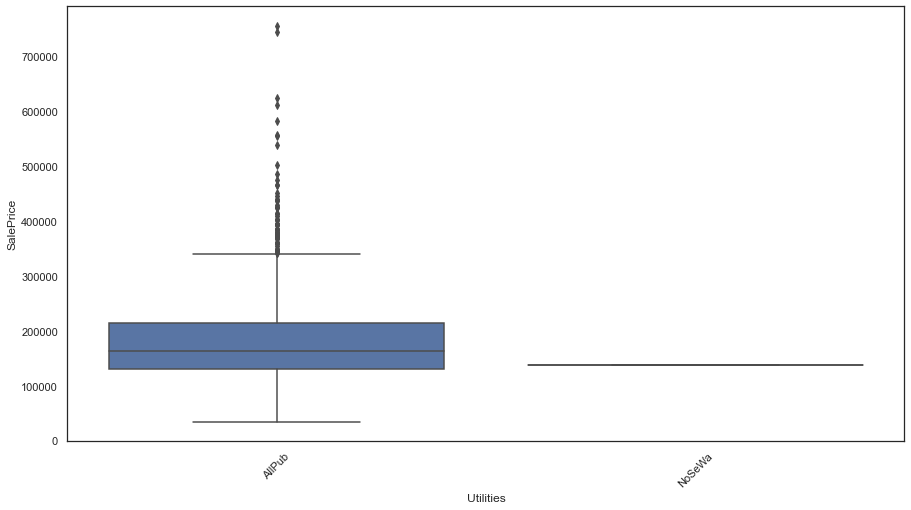

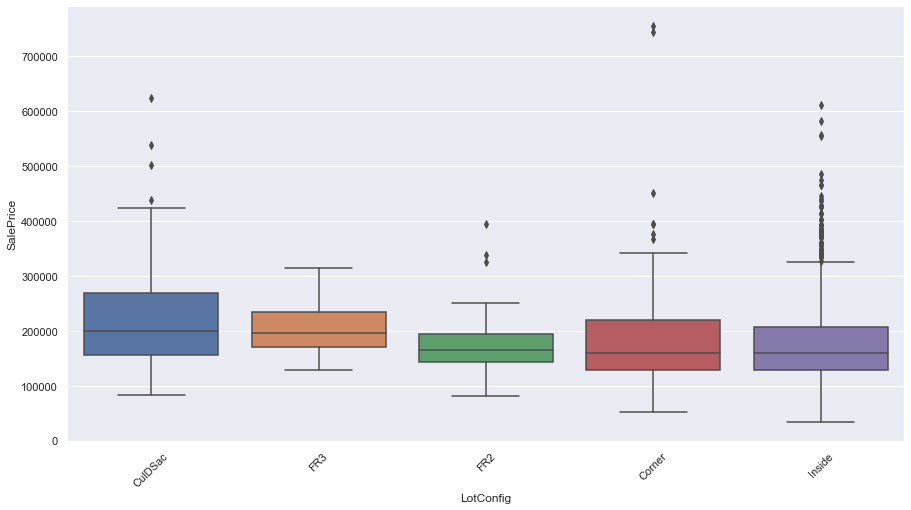

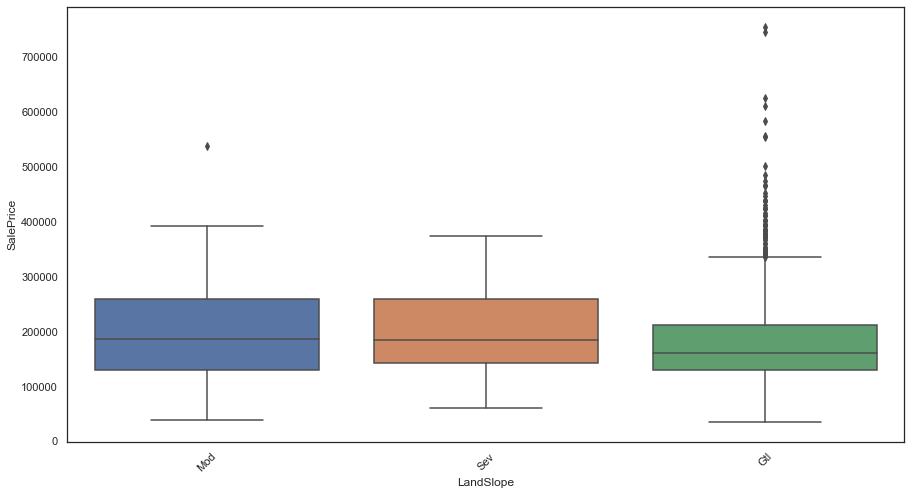

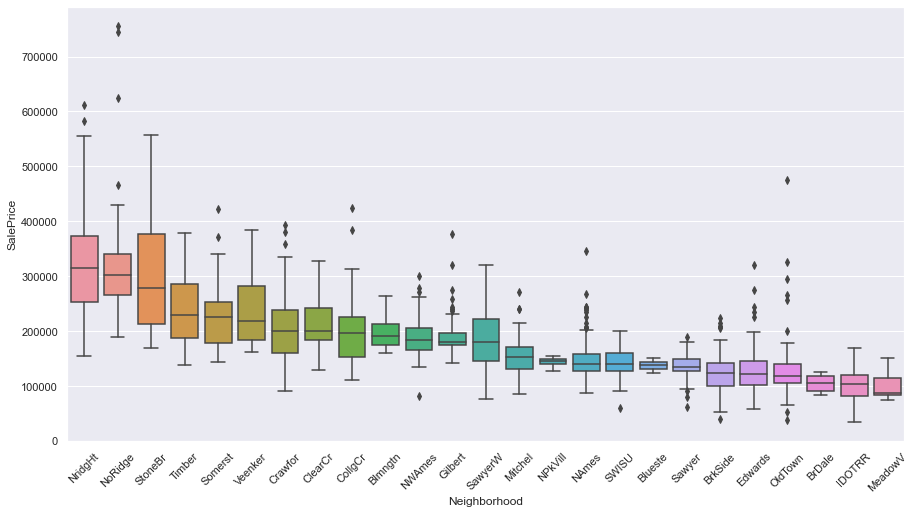

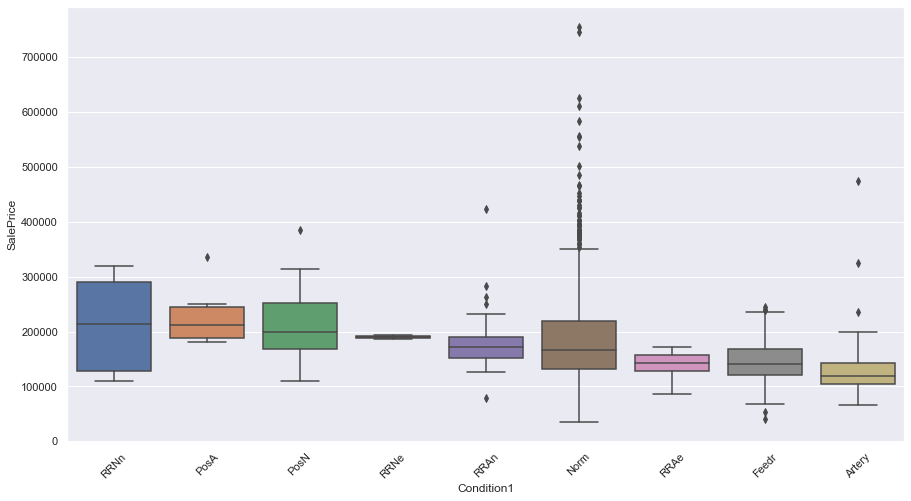

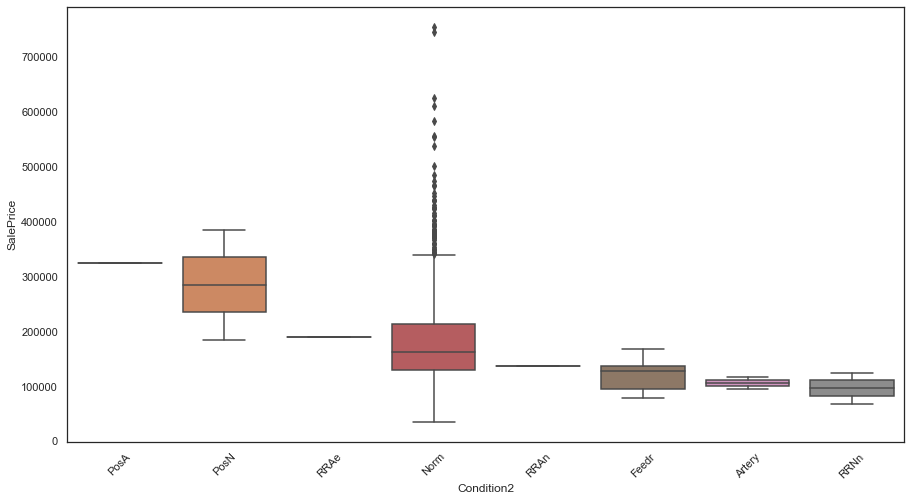

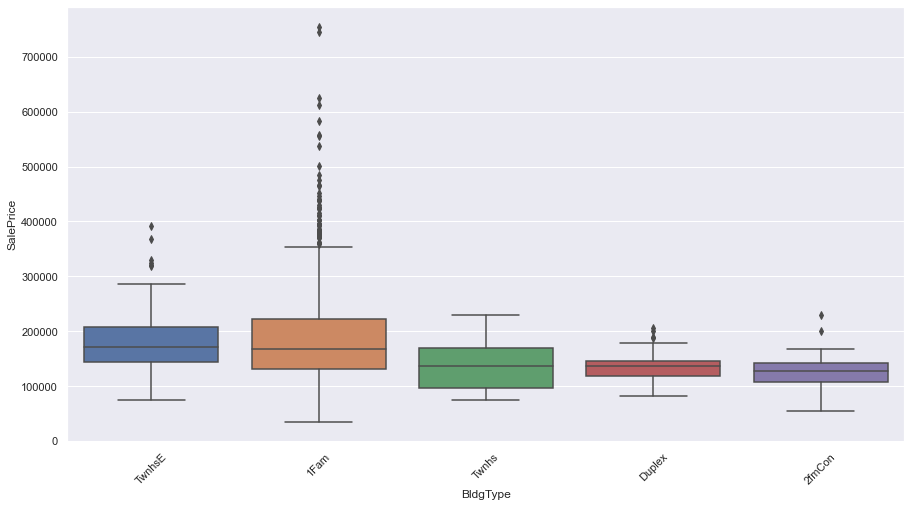

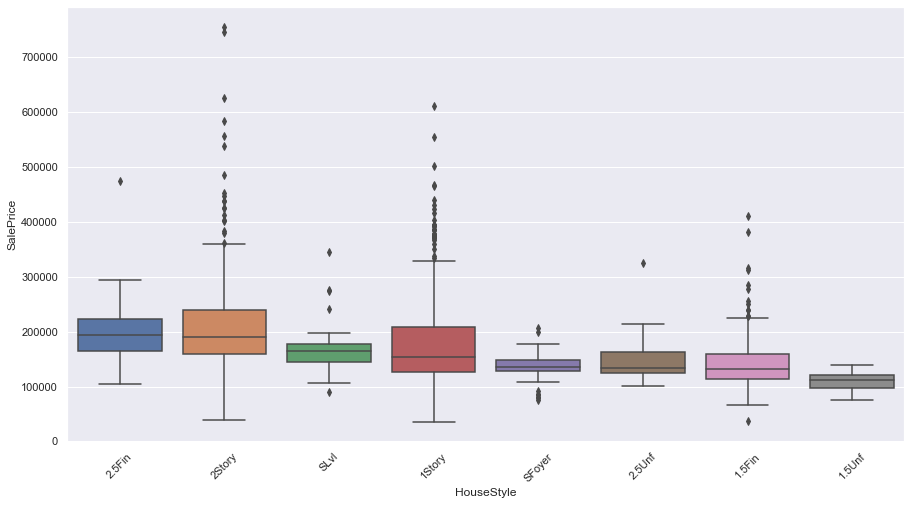

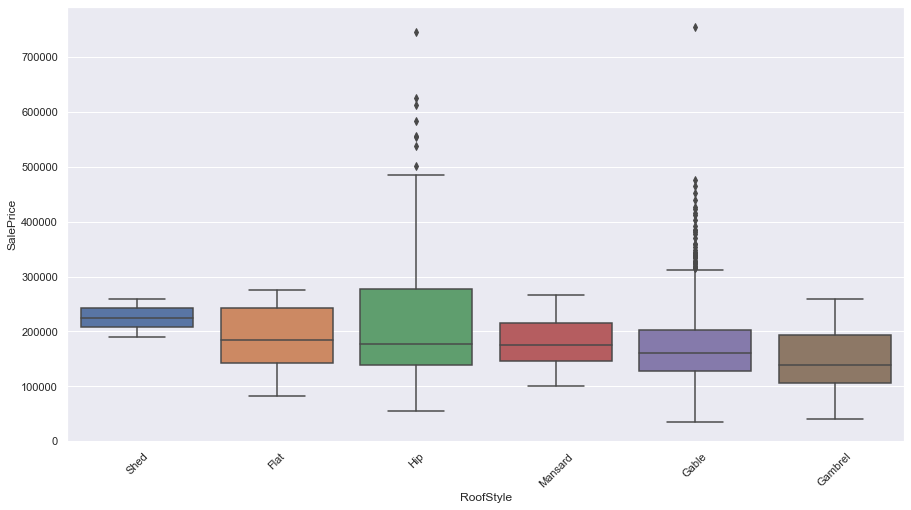

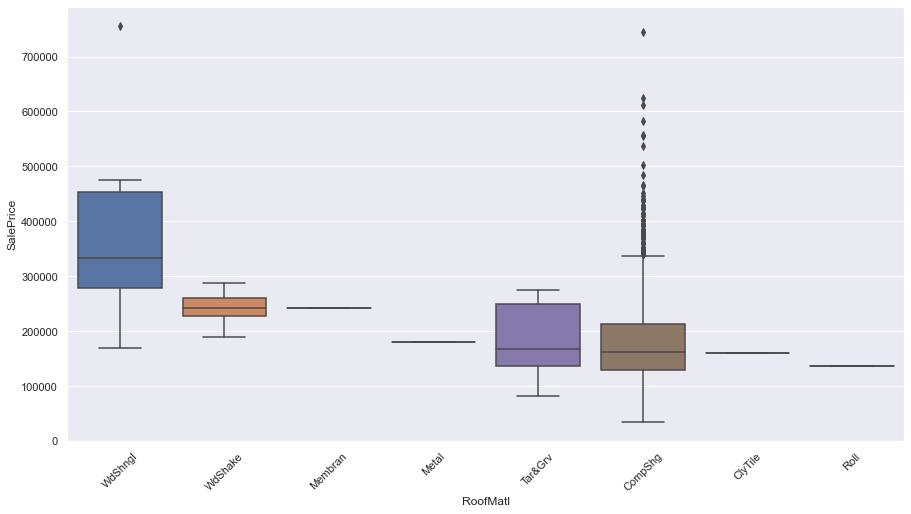

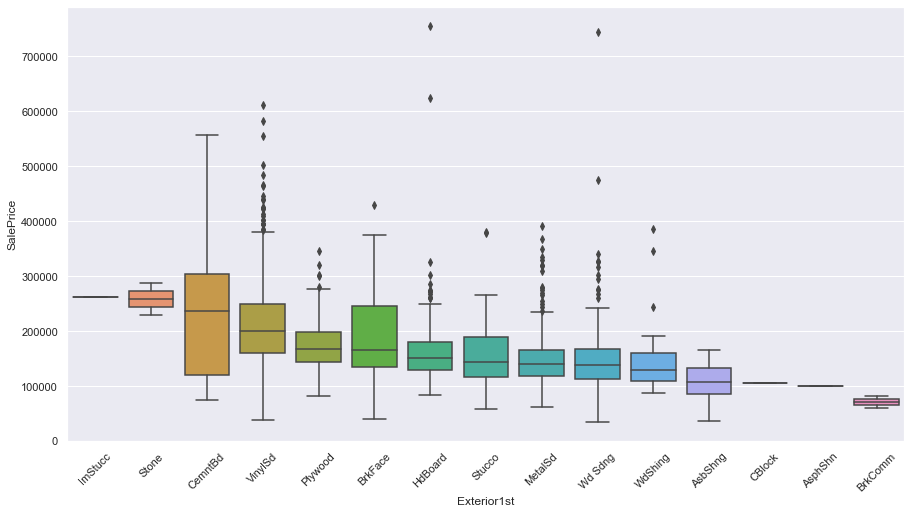

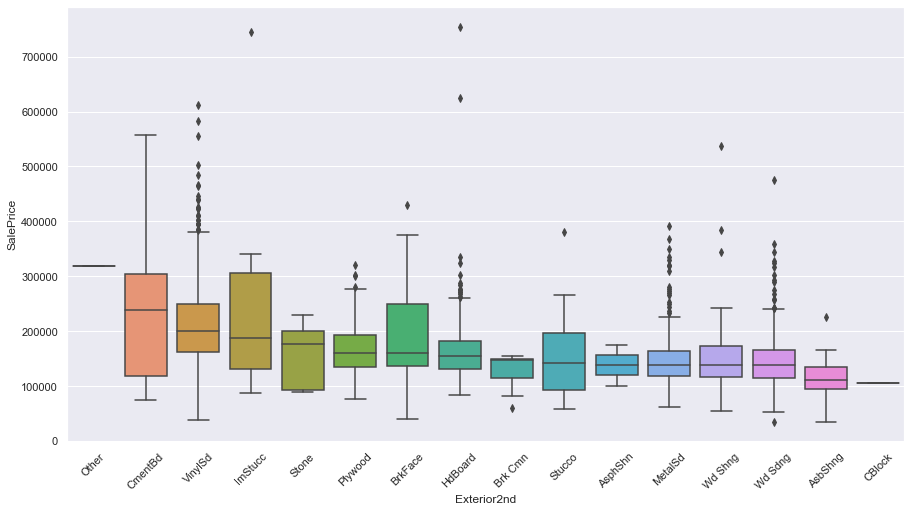

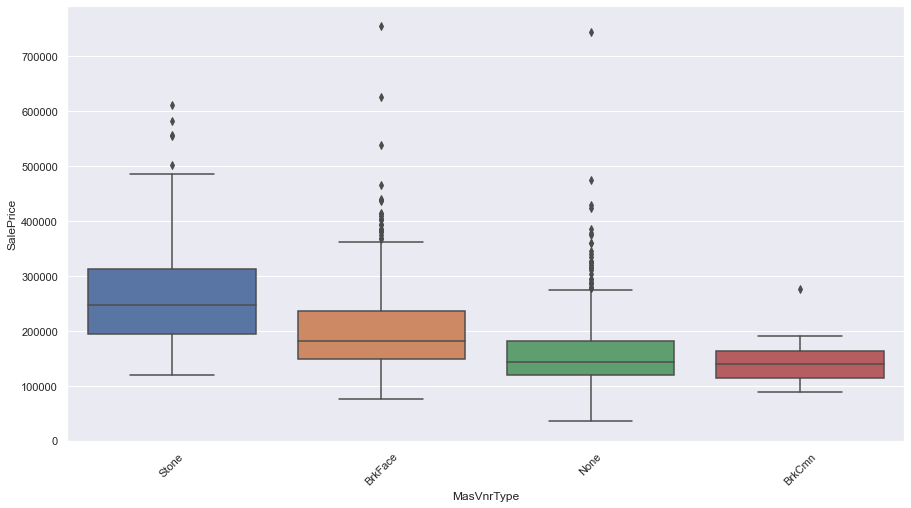

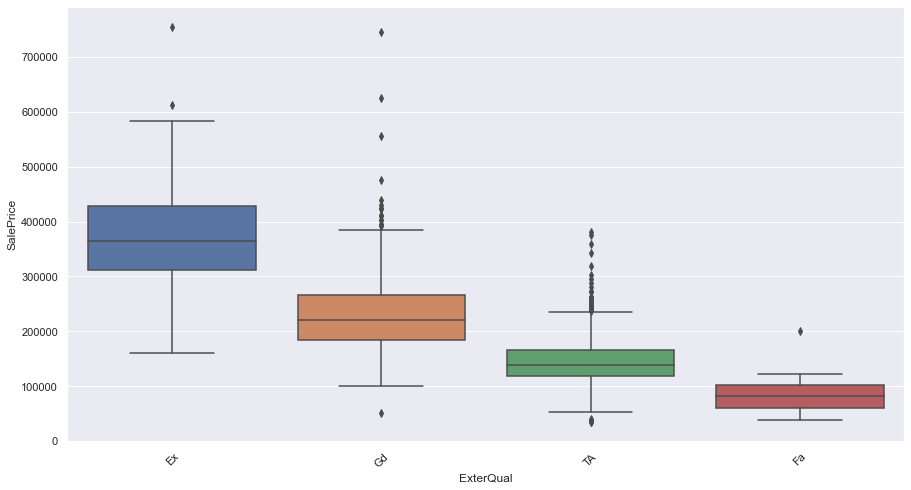

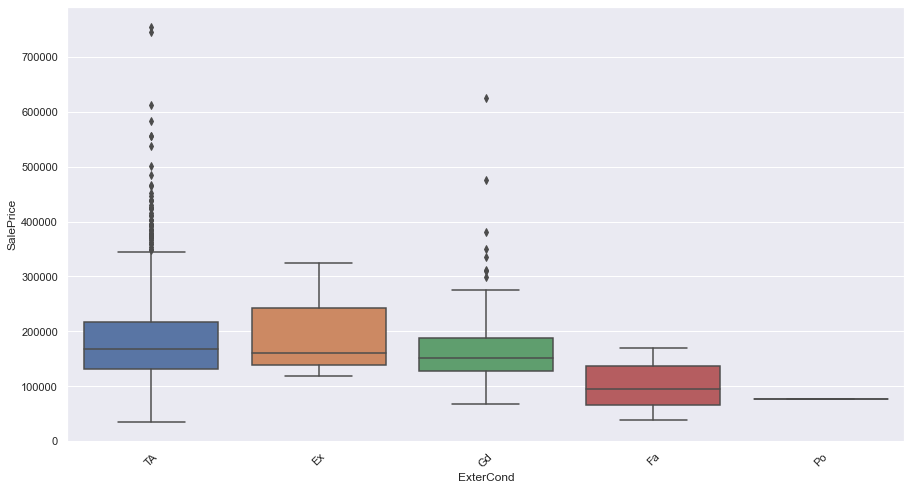

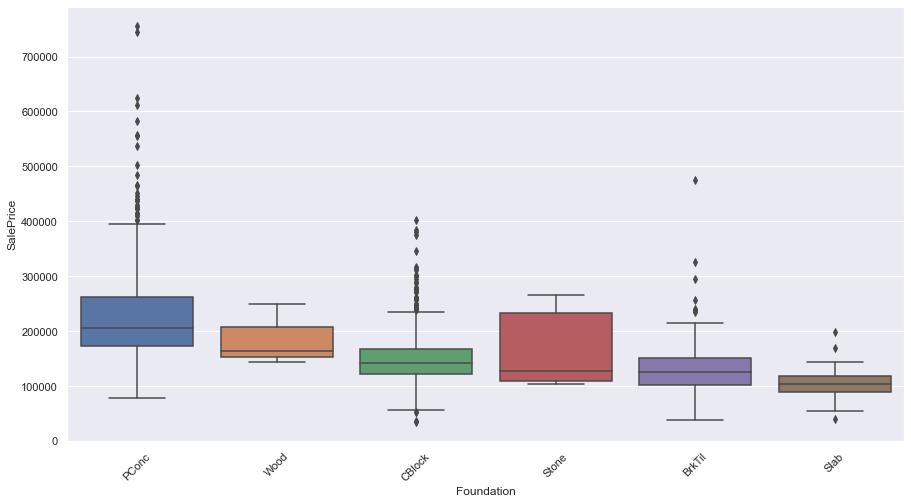

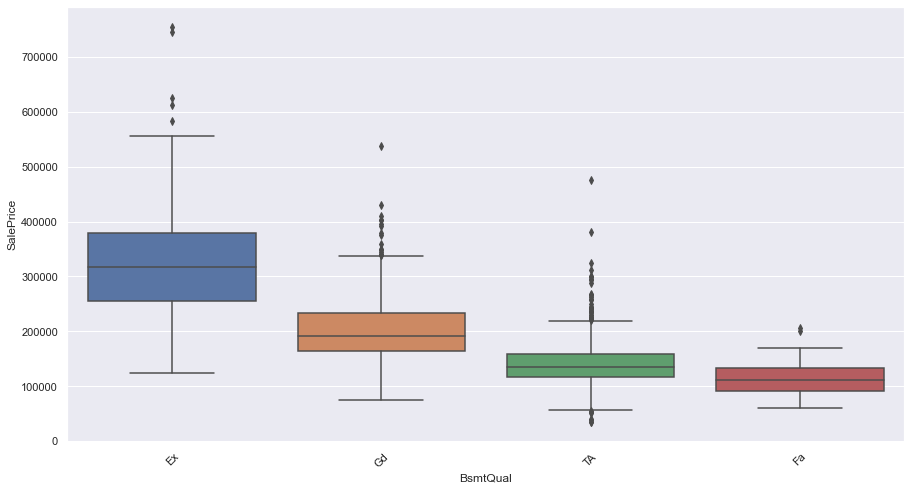

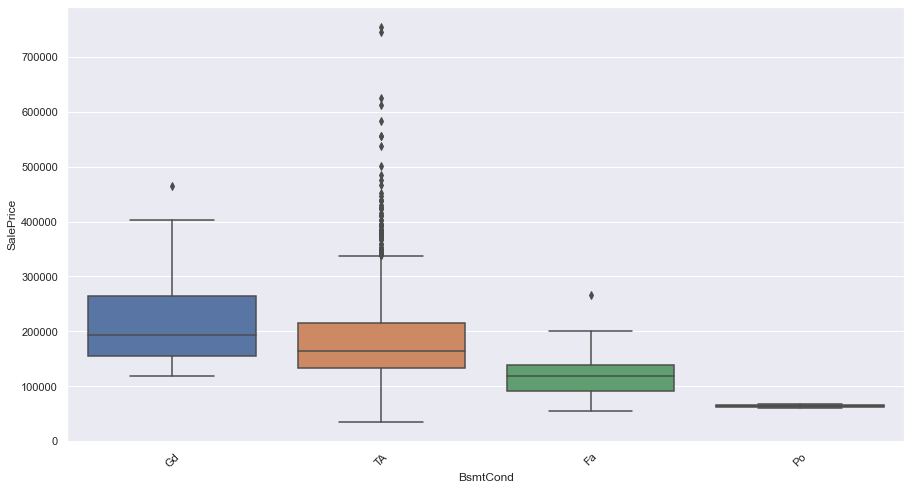

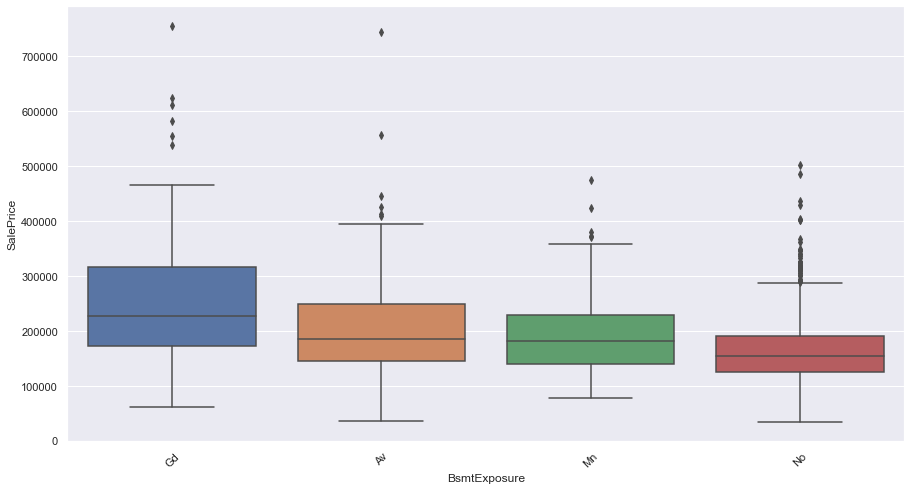

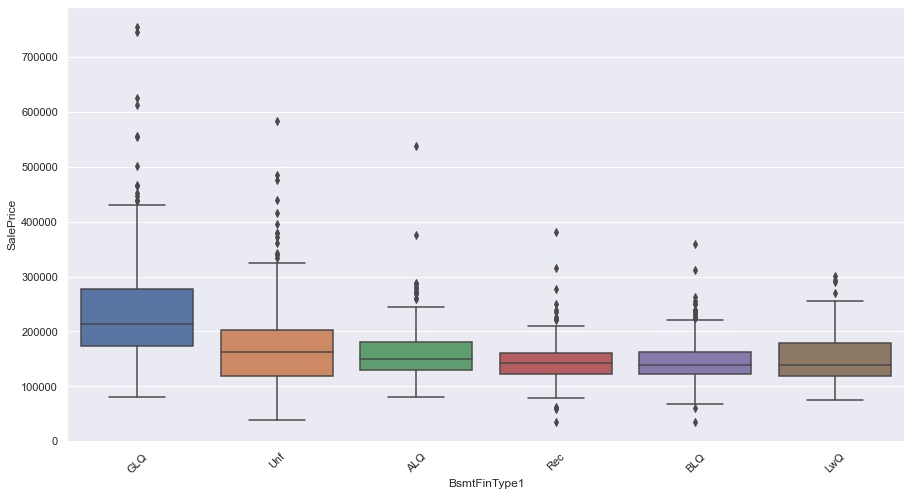

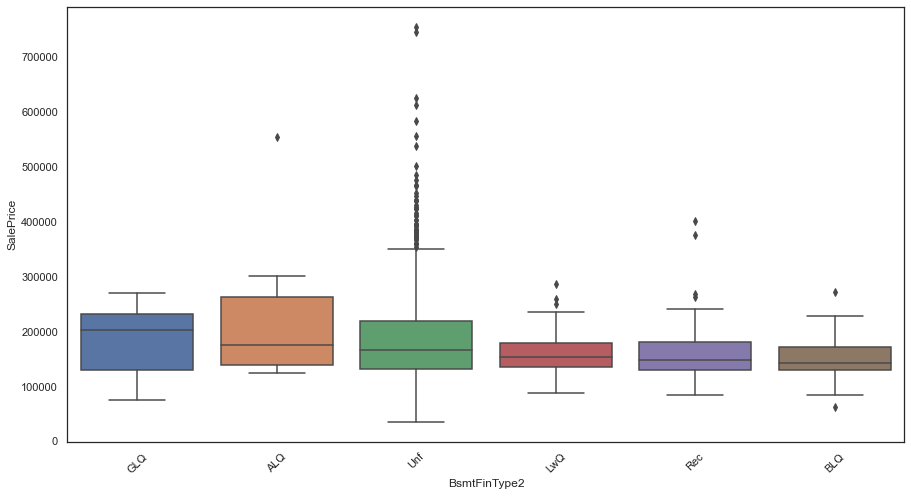

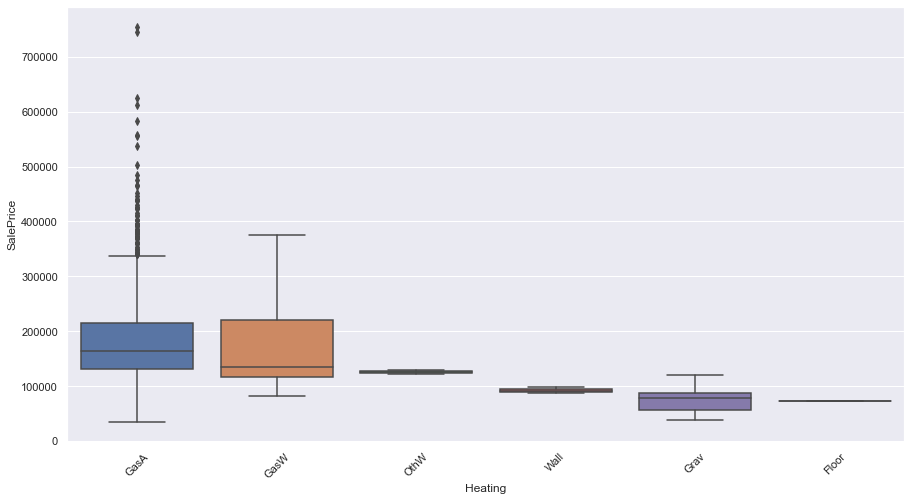

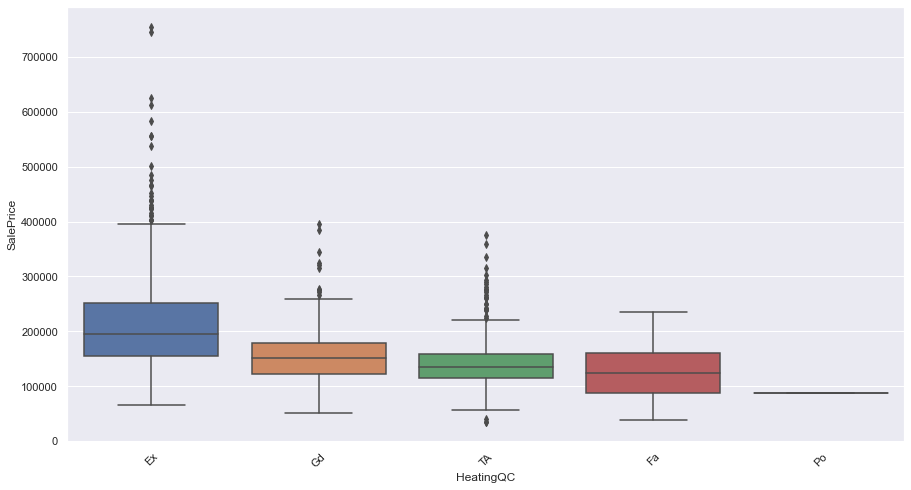

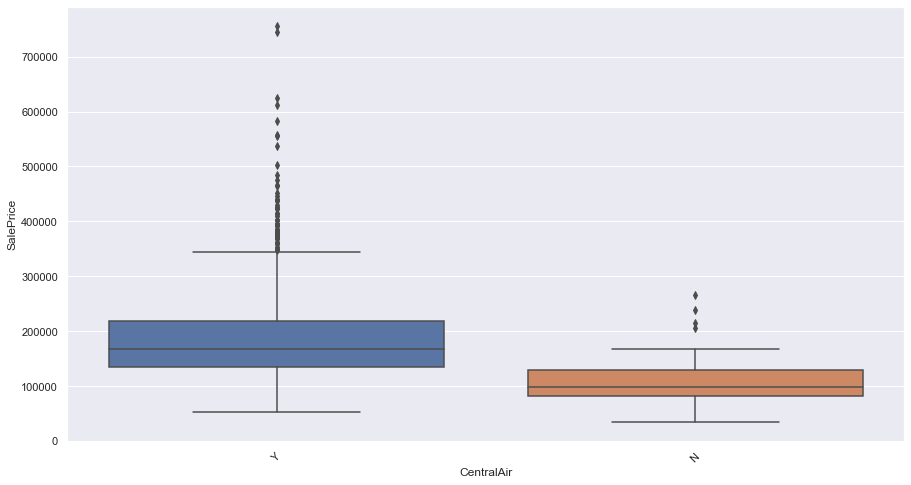

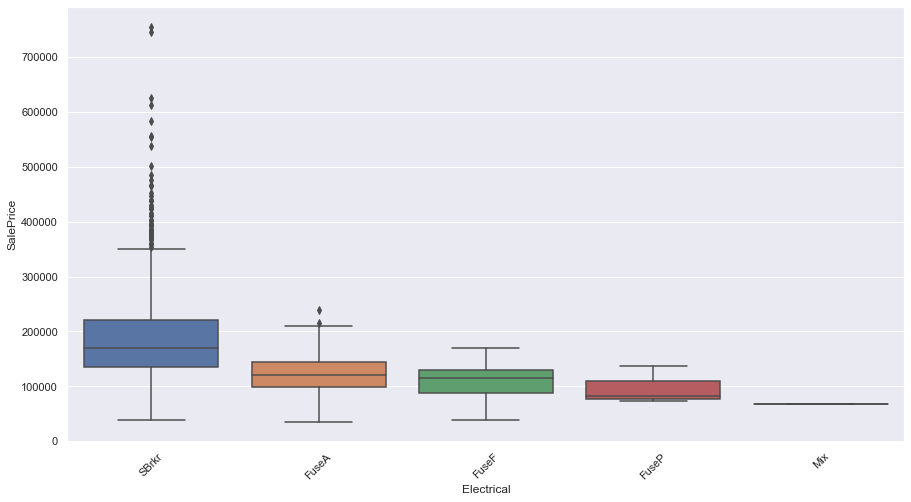

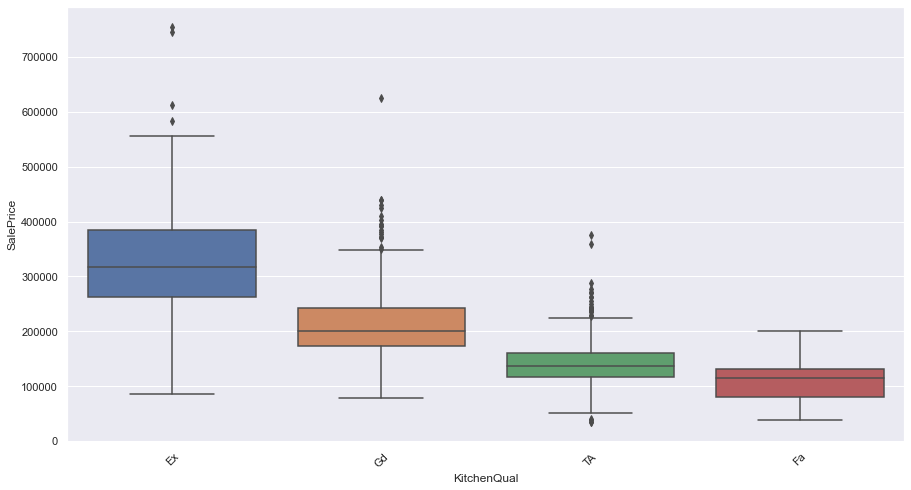

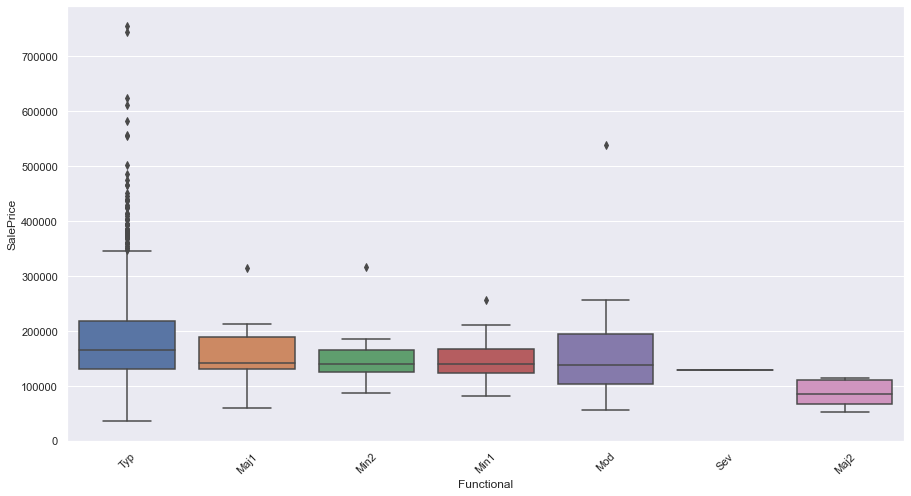

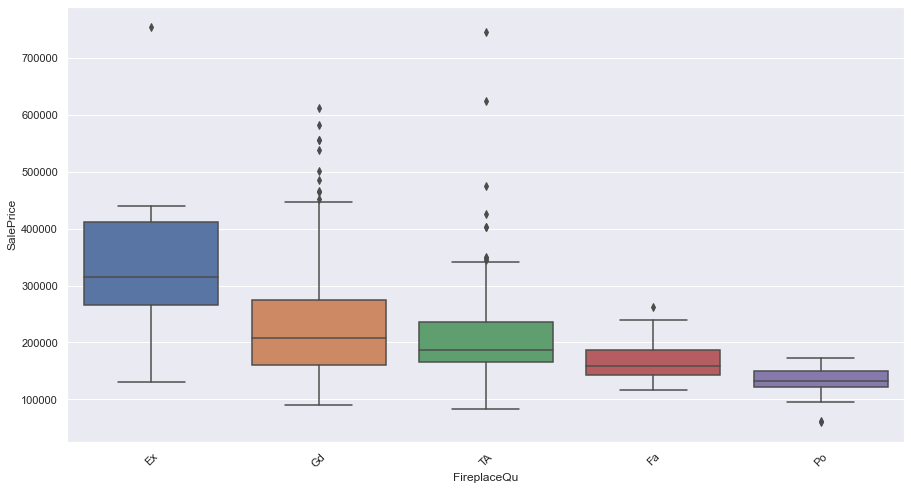

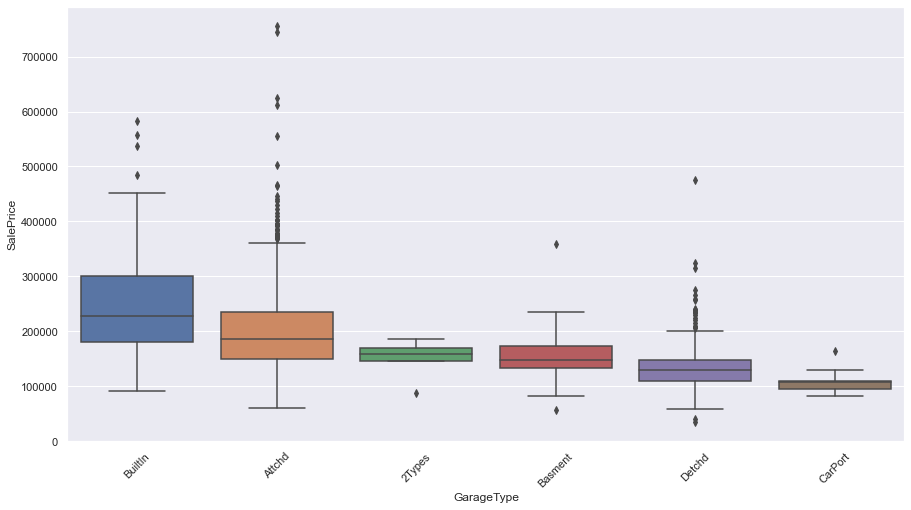

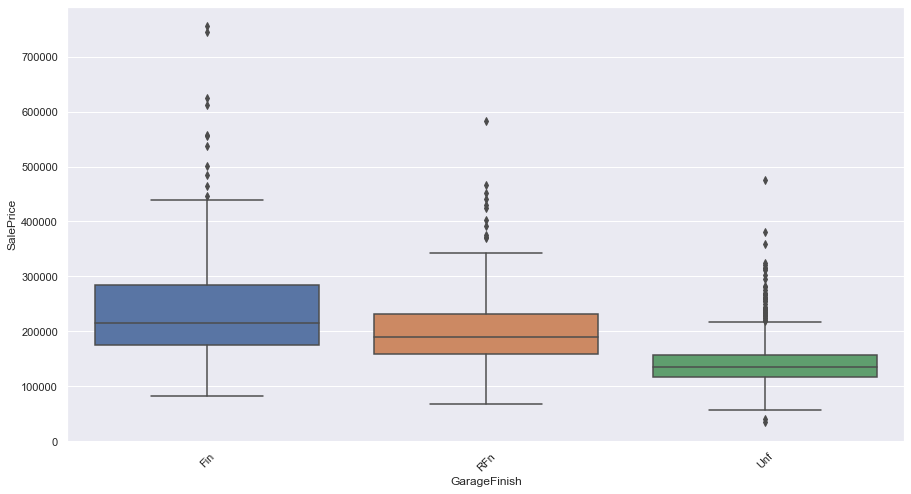

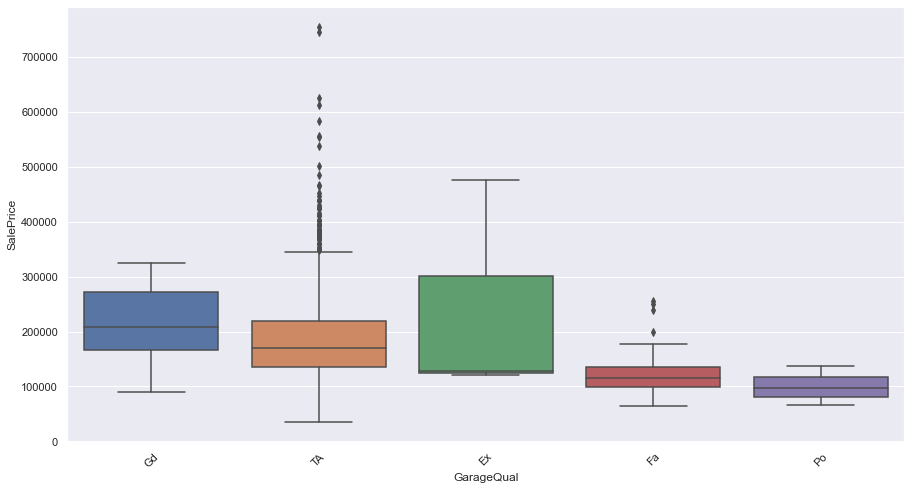

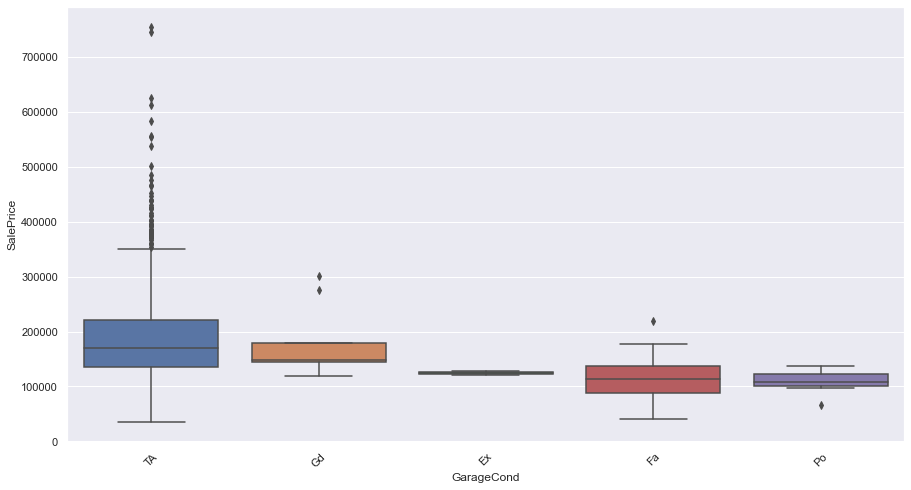

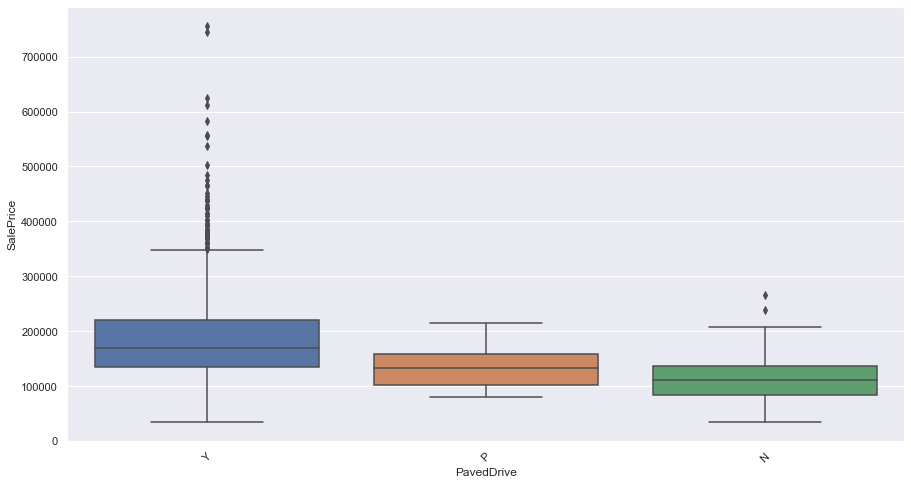

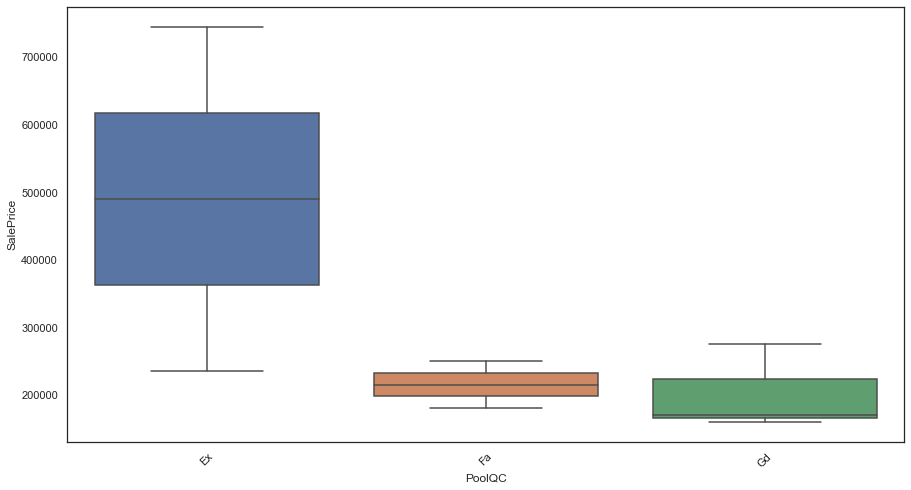

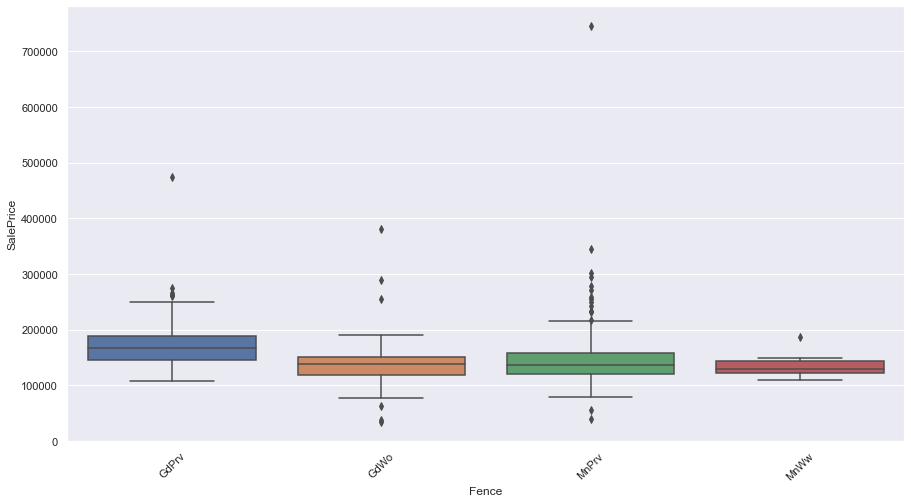

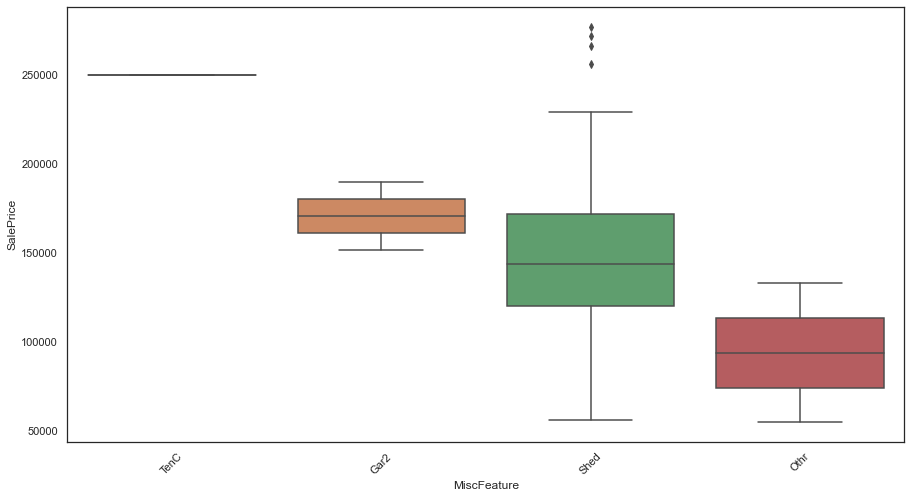

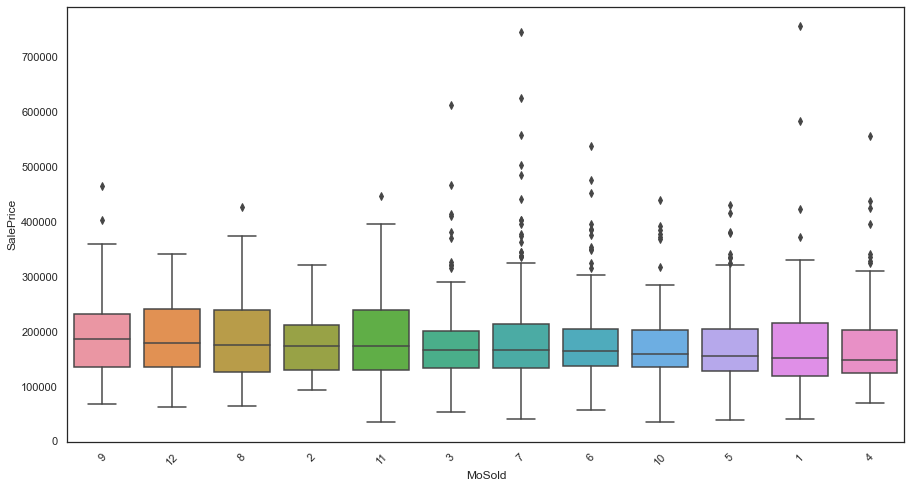

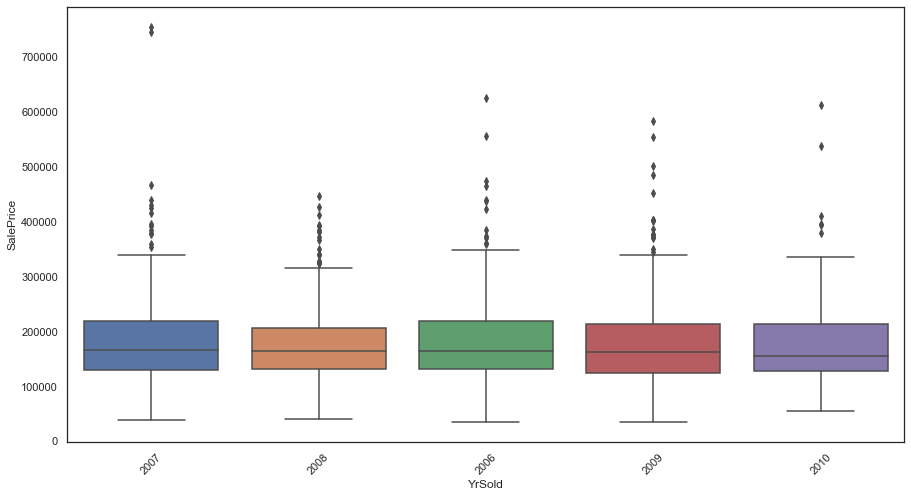

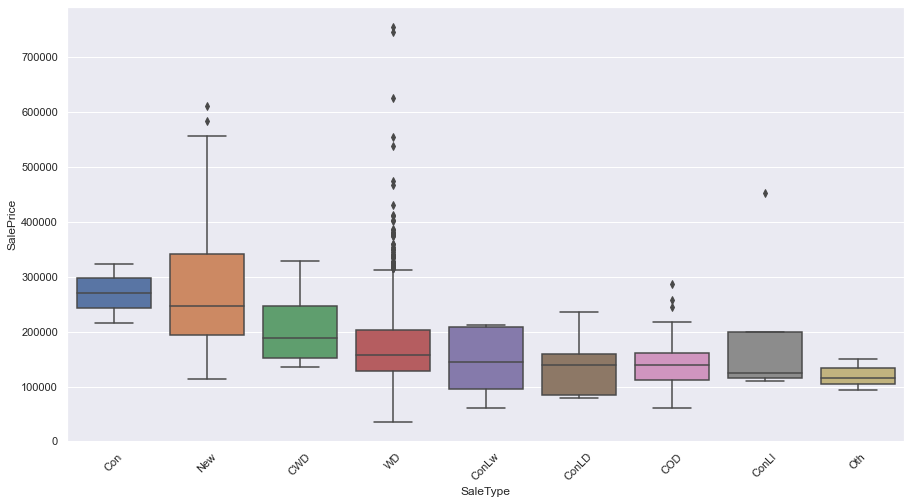

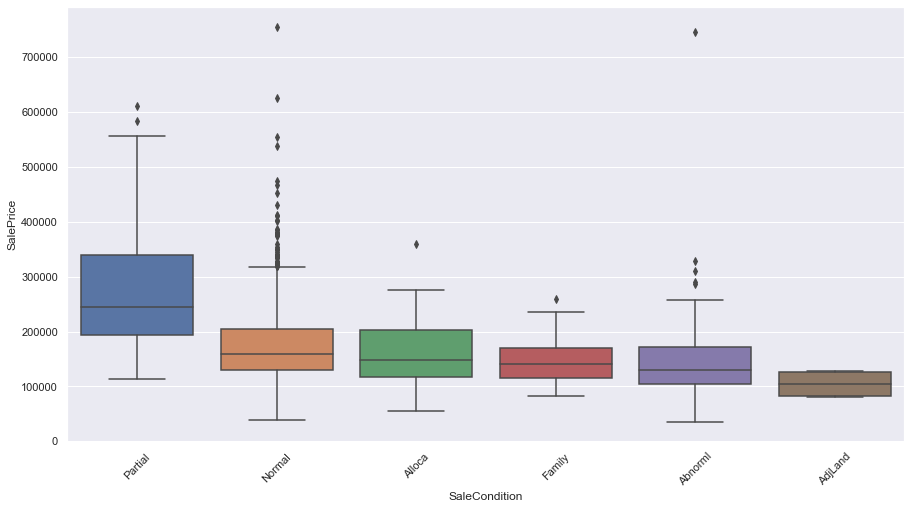

In [24]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

for cvar in catlist:   
    # Group Difference
    mstr = 'SalePrice ~ ' + cvar
    mod = ols(mstr,data=train0).fit()                
    aov_table = sm.stats.anova_lm(mod, typ=2)

    # ---------------------------------
    # The Figure
    # ---------------------------------
    sns.set(rc={'figure.facecolor':'white'})

    plt.figure(figsize = (15,8))   
    
    # Ordering by median
    temp = train0.groupby([cvar])['SalePrice'].median().sort_values(ascending=False).reset_index()   
    
    # Boxplot
    if aov_table['PR(>F)'][0] >= 0.01:
        with sns.axes_style("white"):
            sns.boxplot(x=train0[cvar], 
                y=train0['SalePrice'],
                order = list(temp[cvar]))
            
    elif aov_table['PR(>F)'][0] < 0.01:
        with sns.axes_style("darkgrid"):
            sns.boxplot(x=train0[cvar], 
                y=train0['SalePrice'],
                order = list(temp[cvar]))
    
    plt.xticks(rotation=45)
    #ax.tick_params(axis='x', rotation=45)
    #ax.set_ylabel('Sale Price')
    #ax.set_xlabel(cvar)

## 3A. Imputation - Numerical Variables

In [25]:
# How many Missing Values?
num_train.isna().sum()

Id                   0
LotFrontage        259
LotArea              0
OverallQual          0
OverallCond          0
YearBuilt            0
YearRemodAdd         0
MasVnrArea           8
BsmtFinSF1           0
BsmtFinSF2           0
BsmtUnfSF            0
TotalBsmtSF          0
1stFlrSF             0
2ndFlrSF             0
LowQualFinSF         0
GrLivArea            0
BsmtFullBath         0
BsmtHalfBath         0
FullBath             0
HalfBath             0
BedroomAbvGr         0
KitchenAbvGr         0
TotRmsAbvGrd         0
Fireplaces           0
GarageYrBlt         81
GarageCars           0
GarageArea           0
WoodDeckSF           0
OpenPorchSF          0
EnclosedPorch        0
3SsnPorch            0
ScreenPorch          0
PoolArea             0
MiscVal              0
SalePrice            0
AgeHome              0
YrsSinceRemodel      0
AgeGarage           81
dtype: int64

In [26]:
num_miss = list(num_train.columns[np.where(num_train.isna().sum() > 0)])
print('The Numerical Variables that are missing data:')
list(num_miss)

The Numerical Variables that are missing data:


['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'AgeGarage']

## * LotFrontage

Lot Frontage (Continuous): Linear feet of street connected to property

In [27]:
train0['LotFrontage'].isnull().sum()

259

In [28]:
# Checking the LotConfig values
train0[train0['LotFrontage'].isnull()]['LotConfig'].unique()

array(['Corner', 'Inside', 'CulDSac', 'FR2'], dtype=object)

There are no obvious discrepancies observed with these missing data. Because I believe these homes do not have street connected to the property. Therefore I will replace the missing data with zero. 

In [29]:
# ACTION: Let's change the LotFrontage to 0.0, for the LotFrontage = NaN rows 
train0.loc[(train0['LotFrontage'].isnull()),'LotFrontage']= 0.0

In [30]:
# Checking if the change was made
train0['LotFrontage'].isnull().sum()

0

## * MasVnrArea

(Google) A masonry veneer is an outer layer of brick or stone on a building. Masonry veneer is a construction material used on the exterior walls of homes and commercial buildings. It is comprised of thin pieces of brick or stone, and gives the appearance of solid masonry without the associated weight and cost.

MasVnrArea (Continuous): Masonry veneer area in square feet

MasVnrType (Nominal): Masonry veneer type

In [31]:
train0['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [32]:
# How many missing again?
train0['MasVnrArea'].isnull().sum()

8

In [33]:
# For these 'MasVnrArea' = nan, what'MasVnrType's do we have?
train0[train0['MasVnrArea'].isnull()]['MasVnrType'].unique()

array([nan], dtype=object)

In [34]:
# ACTION: Let's change the MasVnrType to 'None', for the MasVnrArea = NaN rows 
train0.loc[(train0['MasVnrArea'].isnull()),'MasVnrType']='None'

# ACTION: Let's change the MasVnrArea to 0.0, for the MasVnrArea = NaN rows 
train0.loc[(train0['MasVnrArea'].isnull()),'MasVnrArea']= 0.0

In [35]:
train0['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [36]:
print('MasVnrArea = nan are gone')
train0['MasVnrArea'].isnull().sum()

MasVnrArea = nan are gone


0

#### Another Discrepancy
- Here you see that some of the 'MasVnrType' == 'None' rows, have 'MasVnrArea' that are not equal to 0.0

In [37]:
print('Another issue... This does NOT make sense:')
train0[(train0['MasVnrType']=='None') & (train0['MasVnrArea']!=0)]['MasVnrArea']

Another issue... This does NOT make sense:


624     288.0
773       1.0
1230      1.0
1300    344.0
1334    312.0
Name: MasVnrArea, dtype: float64

In [38]:
np.where([(train0['MasVnrType']=='None') & (train0['MasVnrArea']!=0)])

(array([0, 0, 0, 0, 0]), array([ 624,  773, 1230, 1300, 1334]))

In [39]:
# Remove these rows????? 
#train0 = train0.drop(labels=[624,773,1230,1300,1334], axis=0)

### Zeros

In [40]:
# Count number of zeros in all columns of Dataframe
for column_name in num_train.columns:
    column = num_train[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    if count != 0: 
        print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  MasVnrArea  is :  861
Count of zeros in column  BsmtFinSF1  is :  467
Count of zeros in column  BsmtFinSF2  is :  1293
Count of zeros in column  BsmtUnfSF  is :  118
Count of zeros in column  TotalBsmtSF  is :  37
Count of zeros in column  2ndFlrSF  is :  829
Count of zeros in column  LowQualFinSF  is :  1434
Count of zeros in column  BsmtFullBath  is :  856
Count of zeros in column  BsmtHalfBath  is :  1378
Count of zeros in column  FullBath  is :  9
Count of zeros in column  HalfBath  is :  913
Count of zeros in column  BedroomAbvGr  is :  6
Count of zeros in column  KitchenAbvGr  is :  1
Count of zeros in column  Fireplaces  is :  690
Count of zeros in column  GarageCars  is :  81
Count of zeros in column  GarageArea  is :  81
Count of zeros in column  WoodDeckSF  is :  761
Count of zeros in column  OpenPorchSF  is :  656
Count of zeros in column  EnclosedPorch  is :  1252
Count of zeros in column  3SsnPorch  is :  1436
Count of zeros in column  ScreenPorch

In [41]:
print('Zeros could be reasonable, come back here later')

Zeros could be reasonable, come back here later


## 3B. Imputation - Categorica Variables

In [42]:
# How many Missing Values?
cat_train.isna().sum()

MSSubClass          0
MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
MoSold              0
YrSold              0
SaleType            0
SaleCondit

In [43]:
cat_miss = list(cat_train.columns[np.where(cat_train.isna().sum() > 0)])
print('The Categorical Variables that are missing data:')
list(cat_miss)

The Categorical Variables that are missing data:


['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [44]:
# Checking the values available for each categorical variable
for cvar in cat_miss:
    print(cvar, train0[cvar].unique())

Alley [nan 'Grvl' 'Pave']
MasVnrType ['BrkFace' 'None' 'Stone' 'BrkCmn']
BsmtQual ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond ['TA' 'Gd' nan 'Fa' 'Po']
BsmtExposure ['No' 'Gd' 'Mn' 'Av' nan]
BsmtFinType1 ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
BsmtFinType2 ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
Electrical ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
FireplaceQu [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
GarageType ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
GarageFinish ['RFn' 'Unf' 'Fin' nan]
GarageQual ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
GarageCond ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
PoolQC [nan 'Ex' 'Fa' 'Gd']
Fence [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
MiscFeature [nan 'Shed' 'Gar2' 'Othr' 'TenC']


### Alley

In [45]:
print(train0['Alley'].unique())

[nan 'Grvl' 'Pave']


In [46]:
train0.loc[(train0['Alley'].isna()),'Alley']= 'NoAlley'

In [47]:
print(train0['Alley'].unique())

['NoAlley' 'Grvl' 'Pave']


### MasVnrType

I examined this variable above, when looking at the numerical variable MasVnrArea. See above comments. 

### Basement Variables 

Looking closer at the rows with missing data, the data_description.txt file indicates that these houses have "No Basement". If any of these categorical variables (listed here) have NA. 
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2

  - NA	➡➡➡  No Basement

In [48]:
# Grabbing the indices when each bsmt variabes have missing values
# in the data_description.txt, na should mean "No Basement"
bsmt_1 = np.where(train0['BsmtQual'].isna())
bsmt_2 = np.where(train0['BsmtCond'].isna())
bsmt_3 = np.where(train0['BsmtExposure'].isna())
bsmt_4 = np.where(train0['BsmtFinType1'].isna())
bsmt_5 = np.where(train0['BsmtFinType2'].isna())

In [49]:
all_NoBsmt_rows = np.concatenate((bsmt_1, 
                                  bsmt_2, 
                                  bsmt_3, 
                                  bsmt_4,
                                  bsmt_5), axis=None)

In [50]:
No_Bsmt_rows = np.unique(all_NoBsmt_rows)
print('These particular rows should have no basements, lets verify.')
print(No_Bsmt_rows)

These particular rows should have no basements, lets verify.
[  17   39   90  102  156  182  259  332  342  362  371  392  520  532
  533  553  646  705  736  749  778  868  894  897  948  984 1000 1011
 1035 1045 1048 1049 1090 1179 1216 1218 1232 1321 1412]


In [51]:
# lets look at these basement categorical variables 
bsmt_cvars = ['BsmtQual',
             'BsmtCond',
             'BsmtExposure',
             'BsmtFinType1',
             'BsmtFinType2']

print('For these indices, these values exist:')
print('Expecting nan values:')
print('\n')

for bcvar in bsmt_cvars:
    
    print(bcvar,
          No_Bsmt_rows[np.where(train0.loc[No_Bsmt_rows,bcvar].notna())],
          train0.loc[No_Bsmt_rows,bcvar].unique())

For these indices, these values exist:
Expecting nan values:


BsmtQual [332 948] [nan 'Gd']
BsmtCond [332 948] [nan 'TA']
BsmtExposure [332] [nan 'No']
BsmtFinType1 [332 948] [nan 'GLQ' 'Unf']
BsmtFinType2 [948] [nan 'Unf']


BsmtFinSF1 indices with samples > 0 [332]
BsmtFinSF2 indices with samples > 0 [332]
BsmtUnfSF indices with samples > 0 [332 948]
TotalBsmtSF indices with samples > 0 [332 948]
BsmtFullBath indices with samples > 0 [332]
BsmtHalfBath indices with samples > 0 []


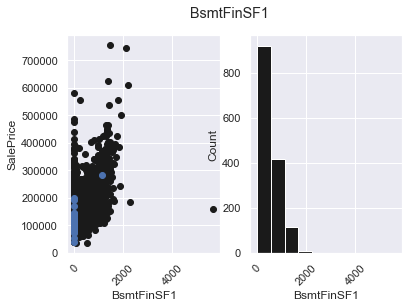

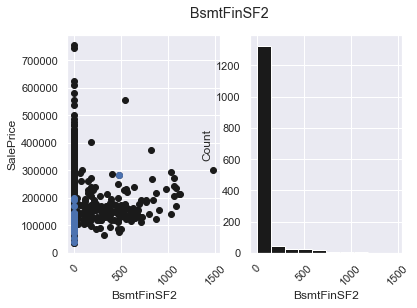

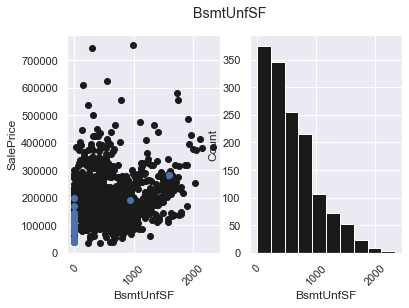

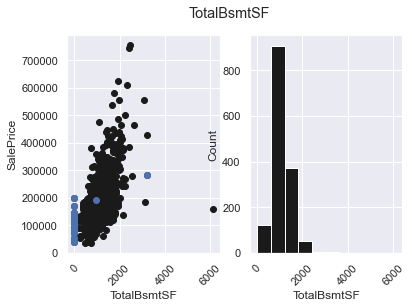

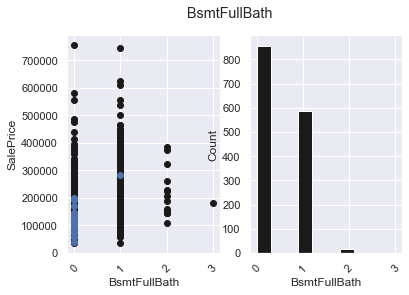

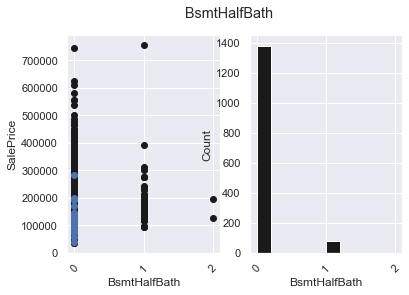

In [52]:
# lets look at these basement numerical variables 
bsmt_nvars = ['BsmtFinSF1', 
             'BsmtFinSF2', 
             'BsmtUnfSF', 
             'TotalBsmtSF', 
             'BsmtFullBath', 
             'BsmtHalfBath']     

for nvar in bsmt_nvars:
    fig, axs = plt.subplots(1,2)
    fig.suptitle(nvar)
    
    # Histogram
    axs[1].hist(train0[nvar],color='k')
    axs[1].tick_params(axis='x', rotation=45)
    axs[1].set_ylabel('Count')
    axs[1].set_xlabel(nvar)
    
    # Scatter
    axs[0].scatter(train0[nvar],train0['SalePrice'],color='k')
    
    # -------------------------------------------------------------------------------
    # Plotting the "no basement" rows to examine if these variables exhibit ZEROs
    # -------------------------------------------------------------------------------
    axs[0].scatter(train0.loc[No_Bsmt_rows,nvar],train0.loc[No_Bsmt_rows,'SalePrice'])

    print(nvar, 'indices with samples > 0', No_Bsmt_rows[np.where(train0.loc[No_Bsmt_rows, nvar]>0)])
    
    axs[0].tick_params(axis='x', rotation=45)
    axs[0].set_ylabel('SalePrice')
    axs[0].set_xlabel(nvar)

In [53]:
print('This row does not make sense. BsmtFinType2 = NaN,')
print('BUT, there is a value for BsmtFinSF2 = 479.')
print('Lets consider dropping this row,')
print('Because BsmtFinType2 = ???? who knows\n')

print(train0.loc[332,['BsmtQual',
             'BsmtCond', 
             'BsmtExposure', 
             'BsmtFinType1',
             'BsmtFinType2',
             'BsmtFinSF1', 
             'BsmtFinSF2', 
             'BsmtUnfSF', 
             'TotalBsmtSF', 
             'BsmtFullBath', 
             'BsmtHalfBath']])

This row does not make sense. BsmtFinType2 = NaN,
BUT, there is a value for BsmtFinSF2 = 479.
Lets consider dropping this row,
Because BsmtFinType2 = ???? who knows

BsmtQual          Gd
BsmtCond          TA
BsmtExposure      No
BsmtFinType1     GLQ
BsmtFinType2     NaN
BsmtFinSF1      1124
BsmtFinSF2       479
BsmtUnfSF       1603
TotalBsmtSF     3206
BsmtFullBath       1
BsmtHalfBath       0
Name: 332, dtype: object


In [54]:
print('Okay, this row is OK. BsmtExposure = NaN.')
print('But clearly there is a basement (unfinished).')
print('ACTION: Changing BsmtExposure = No\n')
print(train0.loc[948,['BsmtQual',
             'BsmtCond', 
             'BsmtExposure', 
             'BsmtFinType1',
             'BsmtFinType1',
             'BsmtFinSF1', 
             'BsmtFinSF2', 
             'BsmtUnfSF', 
             'TotalBsmtSF', 
             'BsmtFullBath', 
             'BsmtHalfBath']])

Okay, this row is OK. BsmtExposure = NaN.
But clearly there is a basement (unfinished).
ACTION: Changing BsmtExposure = No

BsmtQual         Gd
BsmtCond         TA
BsmtExposure    NaN
BsmtFinType1    Unf
BsmtFinType1    Unf
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF       936
TotalBsmtSF     936
BsmtFullBath      0
BsmtHalfBath      0
Name: 948, dtype: object


In [55]:
print(train0.loc[948,'BsmtExposure'])
train0.loc[948,'BsmtExposure']='No'
print(train0.loc[948,'BsmtExposure'])

nan
No


Okay change these rows to 'NoBsmt'

In [56]:
bsmt_cvars

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

In [57]:
print(np.where(train0['BsmtQual'].isna()))
train0.loc[(train0['BsmtQual'].isna()),'BsmtQual']='NoBsmt'
print('Missing values? :', np.where(train0['BsmtQual'].isna()))

(array([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
        520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
        897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
       1218, 1232, 1321, 1412]),)
Missing values? : (array([], dtype=int64),)


In [58]:
print(np.where(train0['BsmtCond'].isna()))
train0.loc[(train0['BsmtCond'].isna()),'BsmtCond']='NoBsmt'
print('Missing values? :', np.where(train0['BsmtCond'].isna()))

(array([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
        520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
        897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
       1218, 1232, 1321, 1412]),)
Missing values? : (array([], dtype=int64),)


In [59]:
print(np.where(train0['BsmtExposure'].isna()))
train0.loc[(train0['BsmtExposure'].isna()),'BsmtExposure']='NoBsmt'
print('Missing values? :', np.where(train0['BsmtExposure'].isna()))

(array([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
        520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
        897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
       1218, 1232, 1321, 1412]),)
Missing values? : (array([], dtype=int64),)


In [60]:
print(np.where(train0['BsmtFinType1'].isna()))
train0.loc[(train0['BsmtFinType1'].isna()),'BsmtFinType1']='NoBsmt'
print('Missing values? :', np.where(train0['BsmtFinType1'].isna()))

(array([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
        520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
        897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
       1218, 1232, 1321, 1412]),)
Missing values? : (array([], dtype=int64),)


In [61]:
# Remove row 332 from this index list
# bsmt_5 = np.where(train0['BsmtFinType2'].isna())
x = bsmt_5[0].tolist()
x.remove(332)

print(x)
train0.loc[x,'BsmtFinType2']='NoBsmt'
print('Missing values? :', np.where(train0['BsmtFinType2'].isna()))

[17, 39, 90, 102, 156, 182, 259, 342, 362, 371, 392, 520, 532, 533, 553, 646, 705, 736, 749, 778, 868, 894, 897, 984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216, 1218, 1232, 1321, 1412]
Missing values? : (array([332]),)


### Garage Variables

In [62]:
# Grabbing the indices when each garage variabes have missing values
garg_1 = np.where(train0['GarageType'].isna())
garg_2 = np.where(train0['GarageFinish'].isna())
garg_3 = np.where(train0['GarageQual'].isna())
garg_4 = np.where(train0['GarageCond'].isna())

In [63]:
all_NoGarg_rows = np.concatenate((garg_1, garg_2, garg_3, garg_4), axis=None)
# print(all_NoGarg_rows)

In [65]:
No_Garg_rows = np.unique(all_NoGarg_rows)
print('These particular rows should have no garages, lets verify.')
print(No_Garg_rows)
print(len(No_Garg_rows))

These particular rows should have no garages, lets verify.
[  39   48   78   88   89   99  108  125  127  140  148  155  163  165
  198  210  241  250  287  291  307  375  386  393  431  434  441  464
  495  520  528  533  535  562  582  613  614  620  635  636  638  649
  705  710  738  750  784  826  843  921  942  954  960  968  970  976
 1009 1011 1030 1038 1096 1123 1131 1137 1143 1173 1179 1218 1219 1234
 1257 1283 1323 1325 1326 1337 1349 1407 1449 1450 1453]
81


In [66]:
# lets look at these garage categorical variables 
garg_cvars = ['GarageType',
             'GarageFinish', 
             'GarageQual', 
             'GarageCond']

print('For each variable, these indices have these values for these particular rows:')
print('Expecting nan values (these are the "no garage" rows):')
print('\n')

for gcvar in garg_cvars:
    
    print(gcvar,
          No_Garg_rows[np.where(train0.loc[No_Garg_rows,gcvar].notna())],
          train0.loc[No_Garg_rows,gcvar].unique())
    
print('\n')

For each variable, these indices have these values for these particular rows:
Expecting nan values (these are the "no garage" rows):


GarageType [] [nan]
GarageFinish [] [nan]
GarageQual [] [nan]
GarageCond [] [nan]




GarageCars indices with samples > 0 []
GarageArea indices with samples > 0 []
GarageYrBlt indices with samples > 0 []


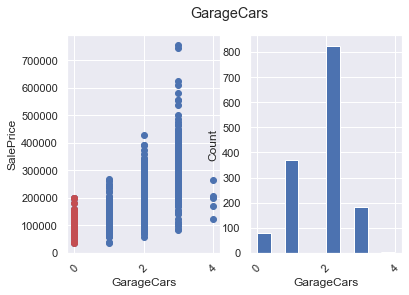

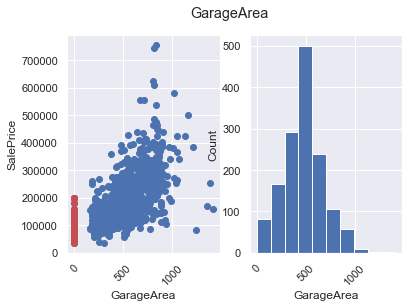

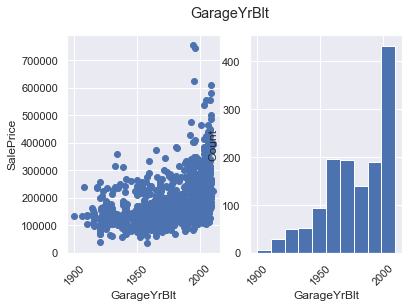

In [67]:
# lets look at these garage numerical variables 
garg_nvars = ['GarageCars', 
             'GarageArea',
             'GarageYrBlt']     

for nvar in garg_nvars:
    fig, axs = plt.subplots(1,2)
    fig.suptitle(nvar)
    
    # Histogram
    axs[1].hist(train0[nvar],color='b')
    axs[1].tick_params(axis='x', rotation=45)
    axs[1].set_ylabel('Count')
    axs[1].set_xlabel(nvar)
    
    # Scatter
    axs[0].scatter(train0[nvar],train0['SalePrice'],color='b')
    
    # -------------------------------------------------------------------------------
    # Plotting the "no garage" rows to examine if these variables exhibit ZEROs
    # -------------------------------------------------------------------------------
    axs[0].scatter(train0.loc[No_Garg_rows,nvar],train0.loc[No_Garg_rows,'SalePrice'],
                  color='r')

    print(nvar, 'indices with samples > 0', No_Garg_rows[np.where(train0.loc[No_Garg_rows, nvar]>0)])
    
    axs[0].tick_params(axis='x', rotation=45)
    axs[0].set_ylabel('SalePrice')
    axs[0].set_xlabel(nvar)

In [68]:
print(np.where(train0['GarageType'].isna()))
train0.loc[(train0['GarageType'].isna()),'GarageType']='None'
print(np.where(train0['GarageType'].isna()))

(array([  39,   48,   78,   88,   89,   99,  108,  125,  127,  140,  148,
        155,  163,  165,  198,  210,  241,  250,  287,  291,  307,  375,
        386,  393,  431,  434,  441,  464,  495,  520,  528,  533,  535,
        562,  582,  613,  614,  620,  635,  636,  638,  649,  705,  710,
        738,  750,  784,  826,  843,  921,  942,  954,  960,  968,  970,
        976, 1009, 1011, 1030, 1038, 1096, 1123, 1131, 1137, 1143, 1173,
       1179, 1218, 1219, 1234, 1257, 1283, 1323, 1325, 1326, 1337, 1349,
       1407, 1449, 1450, 1453]),)
(array([], dtype=int64),)


In [69]:
print(np.where(train0['GarageFinish'].isna()))
train0.loc[(train0['GarageFinish'].isna()),'GarageFinish']='None'
print(np.where(train0['GarageFinish'].isna()))

(array([  39,   48,   78,   88,   89,   99,  108,  125,  127,  140,  148,
        155,  163,  165,  198,  210,  241,  250,  287,  291,  307,  375,
        386,  393,  431,  434,  441,  464,  495,  520,  528,  533,  535,
        562,  582,  613,  614,  620,  635,  636,  638,  649,  705,  710,
        738,  750,  784,  826,  843,  921,  942,  954,  960,  968,  970,
        976, 1009, 1011, 1030, 1038, 1096, 1123, 1131, 1137, 1143, 1173,
       1179, 1218, 1219, 1234, 1257, 1283, 1323, 1325, 1326, 1337, 1349,
       1407, 1449, 1450, 1453]),)
(array([], dtype=int64),)


In [70]:
print(np.where(train0['GarageQual'].isna()))
train0.loc[(train0['GarageQual'].isna()),'GarageQual']='None'
print(np.where(train0['GarageQual'].isna()))

(array([  39,   48,   78,   88,   89,   99,  108,  125,  127,  140,  148,
        155,  163,  165,  198,  210,  241,  250,  287,  291,  307,  375,
        386,  393,  431,  434,  441,  464,  495,  520,  528,  533,  535,
        562,  582,  613,  614,  620,  635,  636,  638,  649,  705,  710,
        738,  750,  784,  826,  843,  921,  942,  954,  960,  968,  970,
        976, 1009, 1011, 1030, 1038, 1096, 1123, 1131, 1137, 1143, 1173,
       1179, 1218, 1219, 1234, 1257, 1283, 1323, 1325, 1326, 1337, 1349,
       1407, 1449, 1450, 1453]),)
(array([], dtype=int64),)


In [71]:
print(np.where(train0['GarageCond'].isna()))
train0.loc[(train0['GarageCond'].isna()),'GarageCond']='None'
print(np.where(train0['GarageCond'].isna()))

(array([  39,   48,   78,   88,   89,   99,  108,  125,  127,  140,  148,
        155,  163,  165,  198,  210,  241,  250,  287,  291,  307,  375,
        386,  393,  431,  434,  441,  464,  495,  520,  528,  533,  535,
        562,  582,  613,  614,  620,  635,  636,  638,  649,  705,  710,
        738,  750,  784,  826,  843,  921,  942,  954,  960,  968,  970,
        976, 1009, 1011, 1030, 1038, 1096, 1123, 1131, 1137, 1143, 1173,
       1179, 1218, 1219, 1234, 1257, 1283, 1323, 1325, 1326, 1337, 1349,
       1407, 1449, 1450, 1453]),)
(array([], dtype=int64),)


In [72]:
print(np.where(train0['GarageYrBlt'].isna())) # Leaving these as NaNs

(array([  39,   48,   78,   88,   89,   99,  108,  125,  127,  140,  148,
        155,  163,  165,  198,  210,  241,  250,  287,  291,  307,  375,
        386,  393,  431,  434,  441,  464,  495,  520,  528,  533,  535,
        562,  582,  613,  614,  620,  635,  636,  638,  649,  705,  710,
        738,  750,  784,  826,  843,  921,  942,  954,  960,  968,  970,
        976, 1009, 1011, 1030, 1038, 1096, 1123, 1131, 1137, 1143, 1173,
       1179, 1218, 1219, 1234, 1257, 1283, 1323, 1325, 1326, 1337, 1349,
       1407, 1449, 1450, 1453]),)


### Electrical

In [73]:
print(train0['Electrical'].unique())

['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]


In [74]:
np.where(train0['Electrical'].isna())

(array([1379]),)

In [ ]:
# remove row ??? missing electrical information 

### FireplaceQu

In [75]:
print('FireplaceQu: ', train0['FireplaceQu'].unique())

FireplaceQu:  [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']


In [76]:
print('Firepaces unique values for the NANs: ', train0.loc[train0['FireplaceQu'].isna(),'Fireplaces'].unique())

Firepaces unique values for the NANs:  [0]


In [77]:
train0.loc[(train0['FireplaceQu'].isna()),'FireplaceQu']= 'NoFirePlace'

In [78]:
print('FireplaceQu: ', train0['FireplaceQu'].unique())

FireplaceQu:  ['NoFirePlace' 'TA' 'Gd' 'Fa' 'Ex' 'Po']


### Fence

In [79]:
print('Fence: ', train0['Fence'].unique())

Fence:  [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


In [80]:
train0.loc[(train0['Fence'].isna()),'Fence']= 'NoFence'

In [81]:
print('Fence: ', train0['Fence'].unique())

Fence:  ['NoFence' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


### MiscFeature

In [82]:
print('MiscFeature: ', train0['MiscFeature'].unique())

MiscFeature:  [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [83]:
train0.loc[(train0['MiscFeature'].isna()),'MiscFeature']= 'None'

In [84]:
print('MiscFeature: ', train0['MiscFeature'].unique())

MiscFeature:  ['None' 'Shed' 'Gar2' 'Othr' 'TenC']


### Pool Variables

In [85]:
print('PoolQC: ', train0['PoolQC'].unique())
train0.loc[(train0['PoolQC'].isna()),'PoolQC']= 'NoPool'
print('PoolQC: ', train0['PoolQC'].unique())

PoolQC:  [nan 'Ex' 'Fa' 'Gd']
PoolQC:  ['NoPool' 'Ex' 'Fa' 'Gd']


In [86]:
print('Okay all the PoolArea = 0 rows, are PoolQC = NoPool')
train0.loc[train0['PoolArea']==0,'PoolQC'].unique()

Okay all the PoolArea = 0 rows, are PoolQC = NoPool


array(['NoPool'], dtype=object)

In [87]:
print('Okay all the PoolQC = NoPool rows, are Area = 0')
train0.loc[train0['PoolQC']=='NoPool','PoolArea'].unique()

Okay all the PoolQC = NoPool rows, are Area = 0


array([0])

# Checking The Missing

In [88]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_train = train0.select_dtypes(include=numerics)
numlist = list(num_train)

# How many Missing Values?
num_train.isna().sum()

num_miss = list(num_train.columns[np.where(num_train.isna().sum() > 0)])
print('The Numerical Variables that are missing data:')
list(num_miss)

The Numerical Variables that are missing data:


['GarageYrBlt', 'AgeGarage']

In [89]:
cattypes = ['O']
cat_train = train0.select_dtypes(include=cattypes)
catlist = list(cat_train)

# How many Missing Values?
cat_train.isna().sum()

cat_miss = list(cat_train.columns[np.where(cat_train.isna().sum() > 0)])
print('The Categorical Variables that are missing data:')
list(cat_miss)

The Categorical Variables that are missing data:


['BsmtFinType2', 'Electrical']

# Save Train Dataset

In [90]:
train = train0.drop(labels=[332,1379, 
                           624,773,1230,1300,1334,
                           523,  691, 1182, 1298], 
                    axis=0).reset_index()

In [91]:
train.head()

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeHome,YrsSinceRemodel,AgeGarage
0,0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NoFirePlace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NoPool,NoFence,None,0,2,2008,WD,Normal,208500,5,5,5.0
1,1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NoPool,NoFence,None,0,5,2007,WD,Normal,181500,31,31,31.0
2,2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NoPool,NoFence,None,0,9,2008,WD,Normal,223500,7,6,7.0
3,3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NoPool,NoFence,None,0,2,2006,WD,Abnorml,140000,91,36,8.0
4,4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NoPool,NoFence,None,0,12,2008,WD,Normal,250000,8,8,8.0


In [92]:
train.to_csv('./Data/train_clean.csv')